In [1]:
import feets.preprocess
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import feets
from ipykernel import kernelapp as app
import os



script_dir = os.path.dirname('Results/')
results_dir = os.path.join(script_dir, 'Images/')

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

In [29]:
url = "https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_lightcurves.csv"
url1 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_labels.csv'
url2 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_info.txt'
transient_lc = pd.read_csv(url)
transient_labels = pd.read_csv(url1)
transient_info = pd.read_table(url2,skiprows=1,names=['CRTS_ID' ,'RA' ,'Dec','UT_Date','Mag','CSS_images' ,'SDSS' ,'Others' ,'Followed' ,'Last','LC','FC','Classification'])

# Isolation forest (Machine Learning)

In [3]:
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [4]:
# Reading in the feature.csv data
ft_data = pd.read_csv('features.csv',skiprows=1,names= ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
                                                  'CAR_sigma', 'Con', 'Eta_e', 'Freq1_harmonics_rel_phase_1',
                                                  'LinearTrend', 'MaxSlope', 'Mean', 'Period_fit', 
                                                  'SlottedA_length','SmallKurtosis', 'StructureFunction_index_21'
                                                  ,'ID','Class'])


ft_data.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_sigma,Con,Eta_e,Freq1_harmonics_rel_phase_1,LinearTrend,MaxSlope,Mean,Period_fit,SlottedA_length,SmallKurtosis,StructureFunction_index_21,ID,Class
0,1.50475,1.000000,2.0,0.411765,10.0,0.015152,1.639083e+07,0.133163,-0.000216,310.686183,20.125262,1.000000,6.0,10.438348,1.742156,TranID1209210010044118805,Flare
1,1.53220,1.000000,8.0,0.345946,10.0,0.032787,2.411989e+06,-0.209898,-0.000333,317.453004,19.331475,0.000000,1.0,3.227174,1.723731,TranID1310250040014131234,SN
2,1.24740,0.999302,2.0,0.414634,10.0,0.000000,8.020303e+06,1.009082,0.000009,123.993913,20.123456,0.970337,17.0,0.000310,1.731060,TranID1011080040044131101,SN
3,1.23785,1.000000,6.0,0.410000,10.0,0.061224,4.823456e+06,-0.119399,-0.000227,146.497039,19.704732,0.003795,2.0,1.244926,1.677341,TranID1310250070034110542,SN
4,1.36500,1.000000,30.0,0.371528,10.0,0.073427,2.173539e+05,0.397704,-0.000552,210.703834,18.261774,0.000000,3.0,1.919426,1.403380,TranID1201030070034134767,Blazar


### Data preprocessing

In [16]:
params = ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
                                                  'CAR_sigma', 'Con', 'Eta_e', 'Freq1_harmonics_rel_phase_1',
                                                  'LinearTrend', 'MaxSlope', 'Mean', 
                                                  'SlottedA_length','SmallKurtosis', 'StructureFunction_index_21'
                                                  ]

X = ft_data[params]

 1    2423
-1      83
Name: iforest, dtype: int64
49 CV TranID1510130260134113719


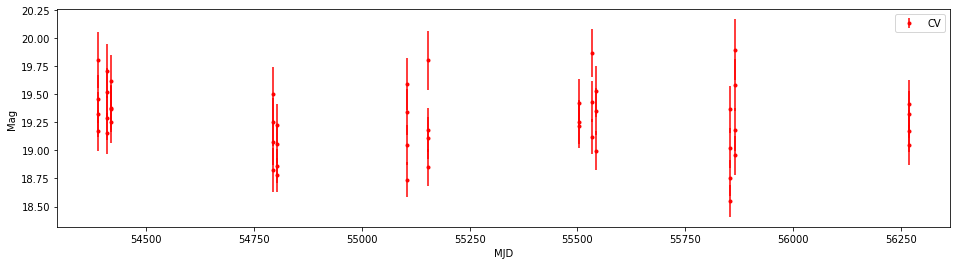

299 Flare TranID1609221010114117243


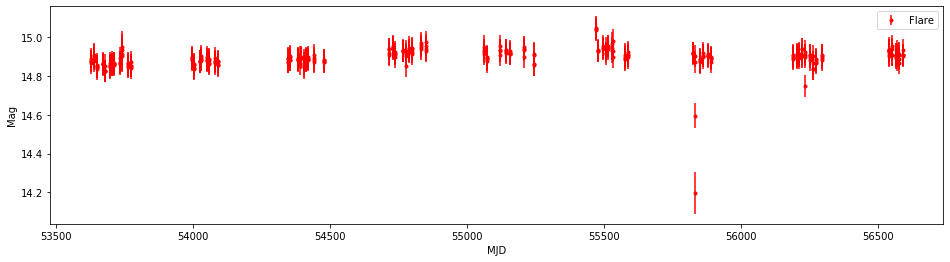

331 Flare TranID1201251260114103174


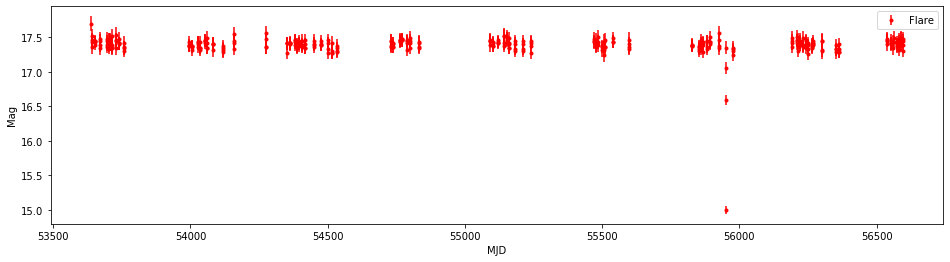

348 Flare TranID1303141290134114251


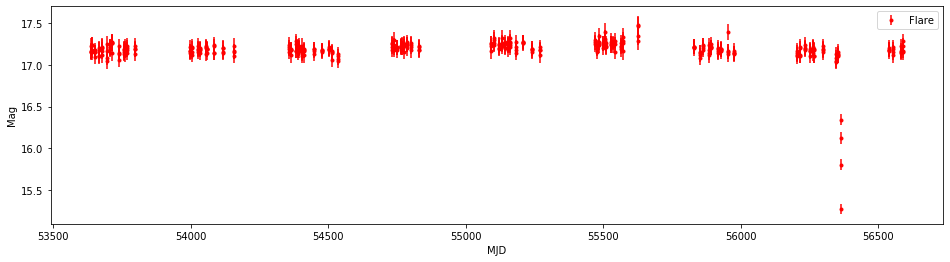

305 HPM TranID1011070010184229345


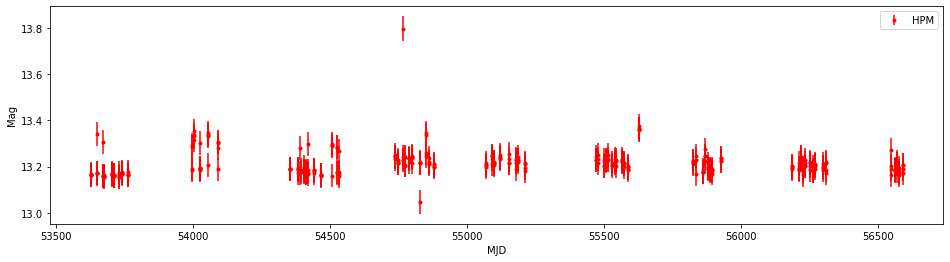

32 CV TranID1310260150154113290


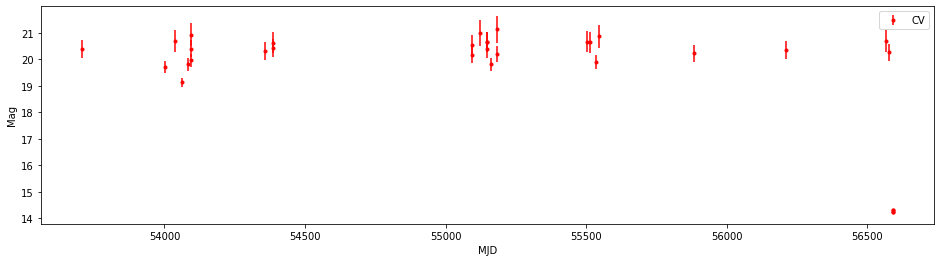

34 Unknown TranID1101041230144125008


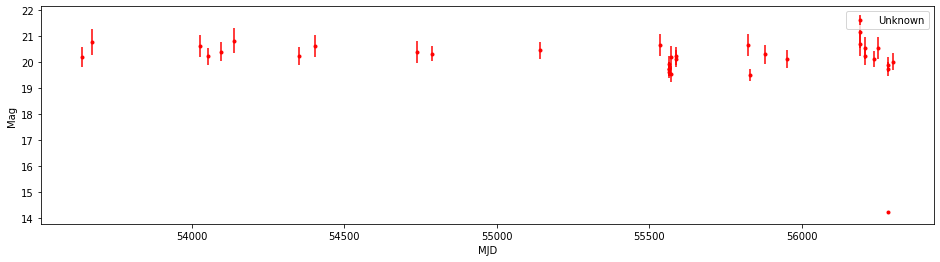

359 CV TranID711081290154130838


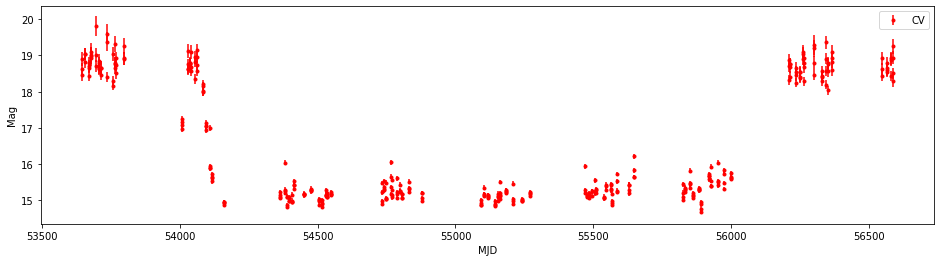

360 Flare TranID909281320154111937


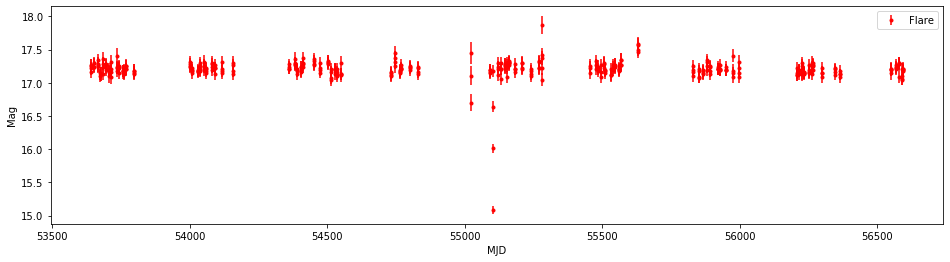

345 Flare TranID1010291040204101820


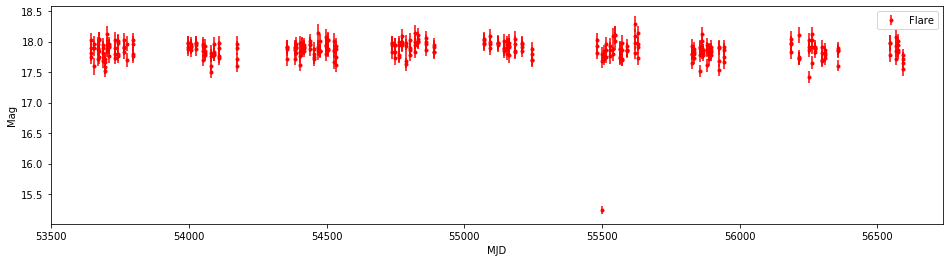

39 CV TranID1211230090264132139


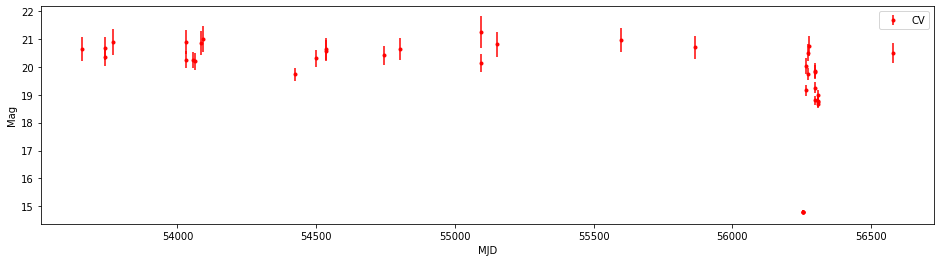

43 CV? TranID1411220260264133920


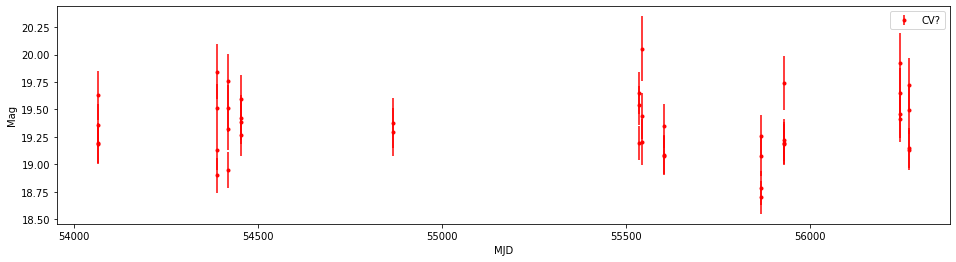

372 Var TranID1102081010244125249


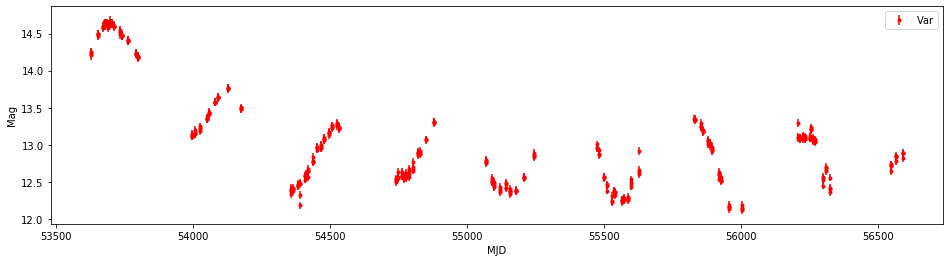

330 Flare TranID1001081010294126339


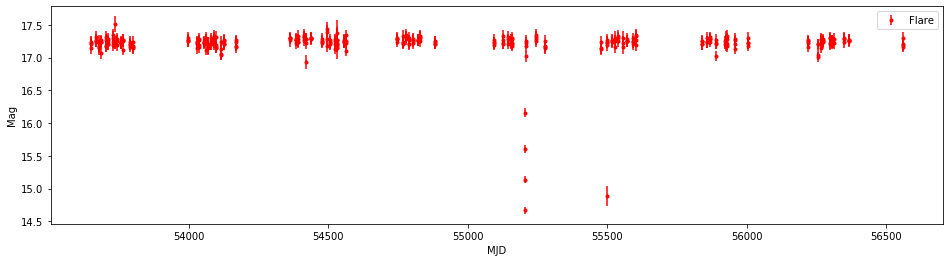

357 AGN TranID1303241120234114292


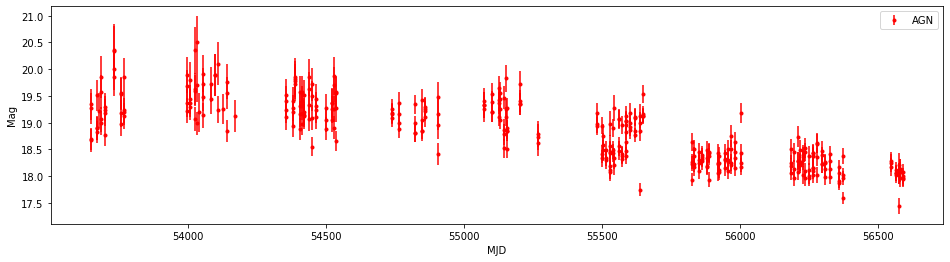

159 Mira TranID910241150234105998


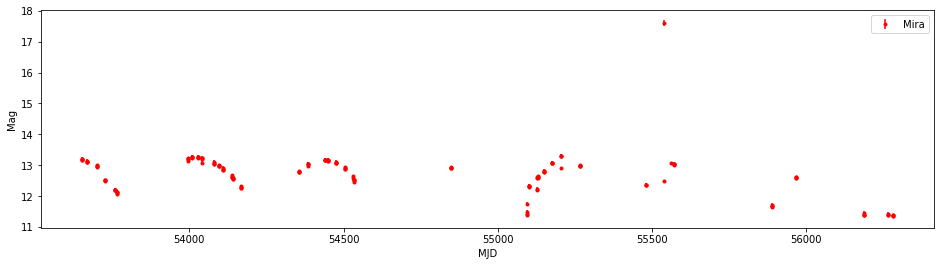

101 HPM TranID1411200040324146816


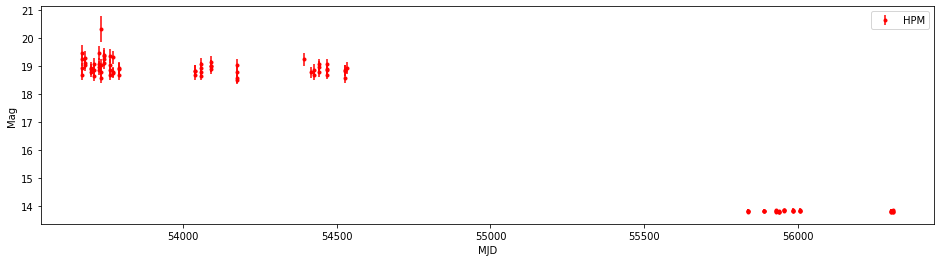

111 YSO? TranID1311140070304134962


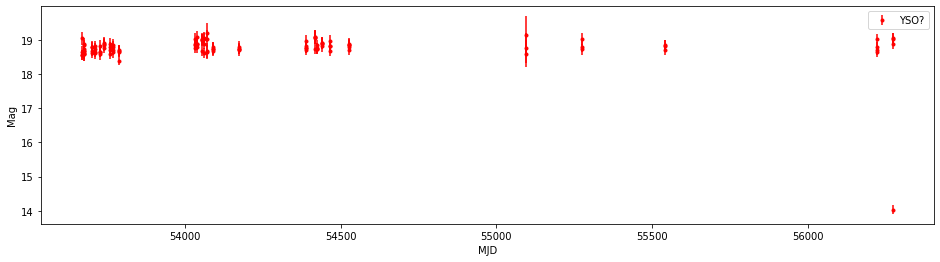

103 LPV TranID1503161230274181022


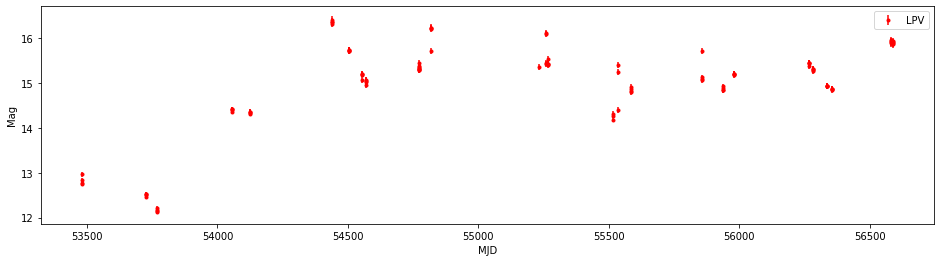

38 Var TranID1212101350304169390


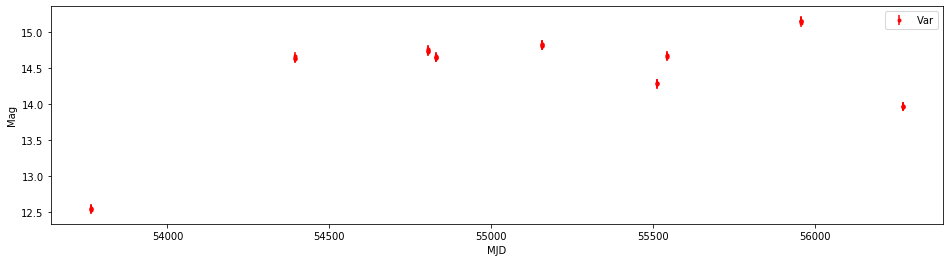

492 CV TranID1602261380334117968


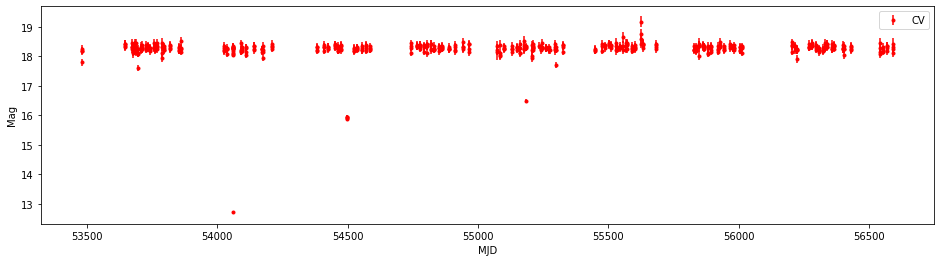

247 CV TranID910291490254147891


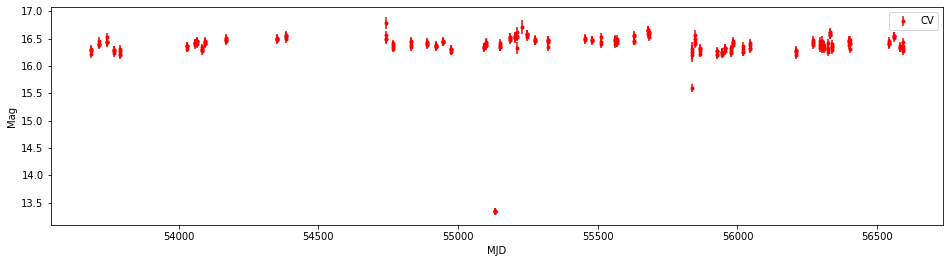

319 CV TranID804161350364129084


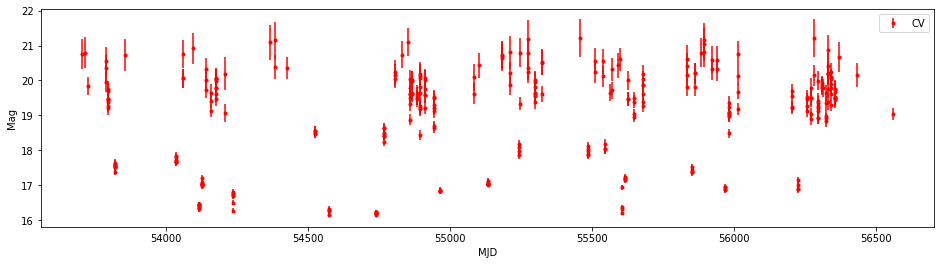

323 Flare TranID1302181430344101379


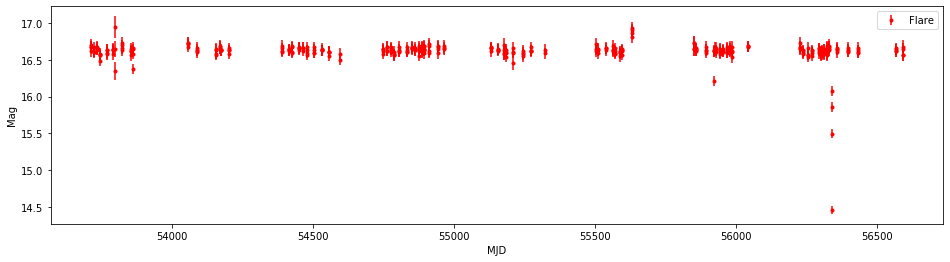

51 AGN TranID1502131490314127926


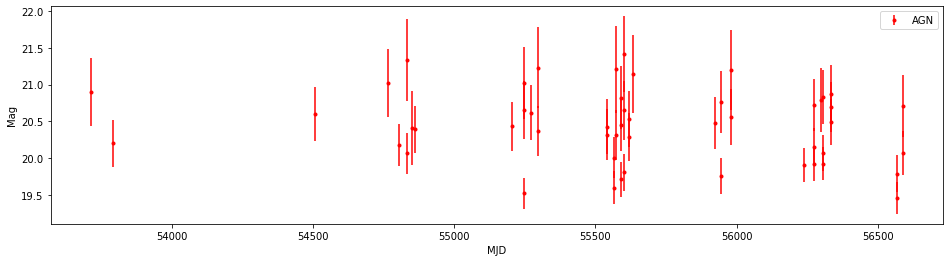

141 HPM TranID1610291630224109495


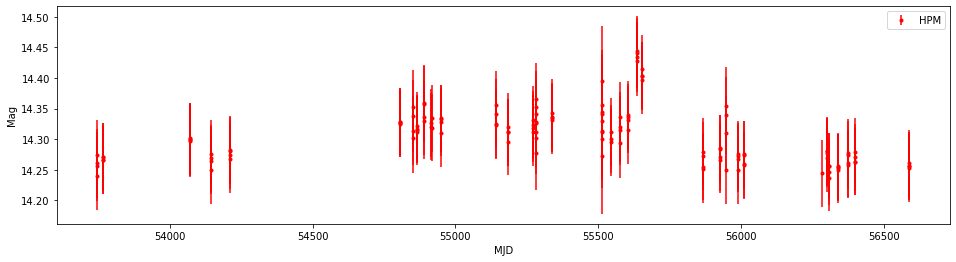

42 CV TranID1502110210474165610


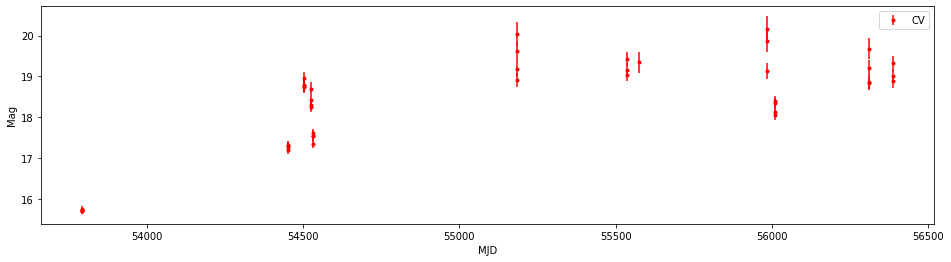

259 Flare TranID1103260070534102536


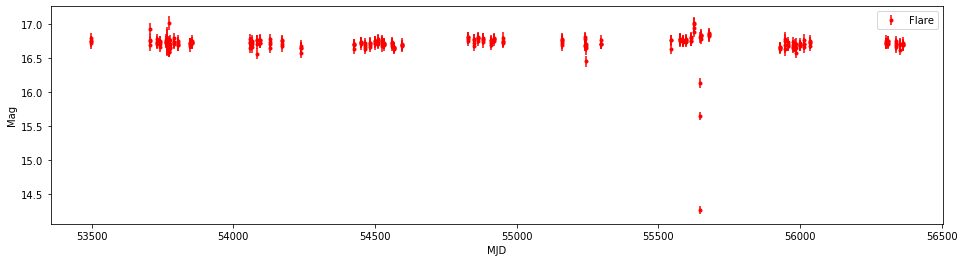

472 Flare TranID1011101120514117494


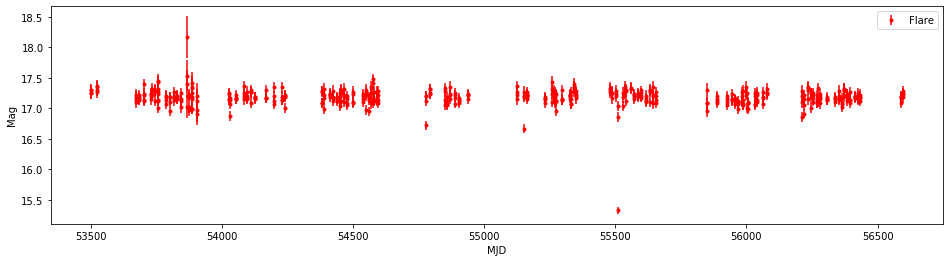

292 CV TranID802081070564124647


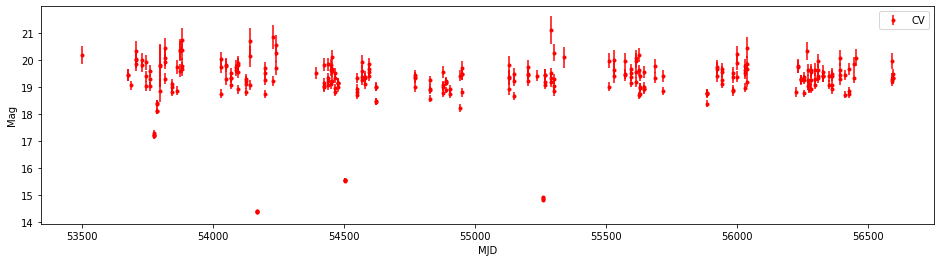

383 Flare TranID1504161150534121066


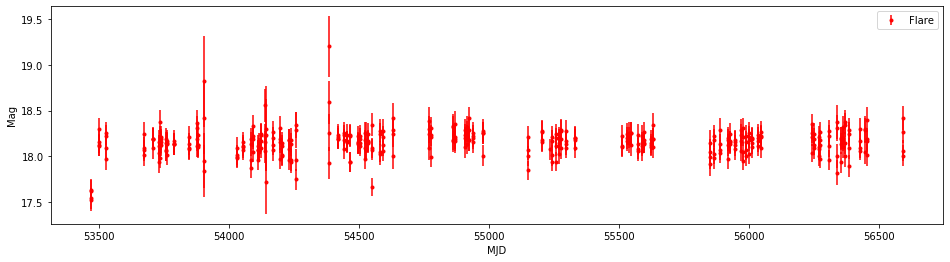

336 AGN TranID1301171290494101134


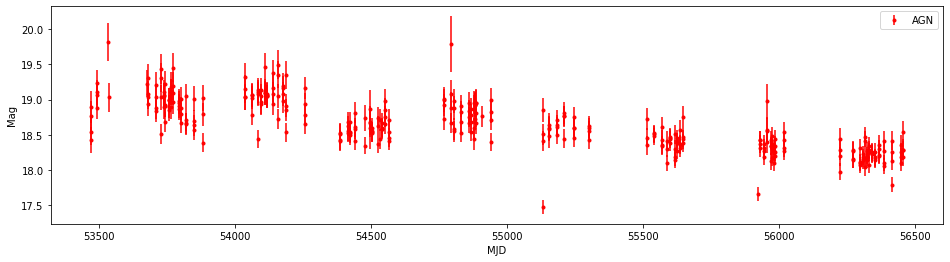

197 CV TranID1003171460404142882


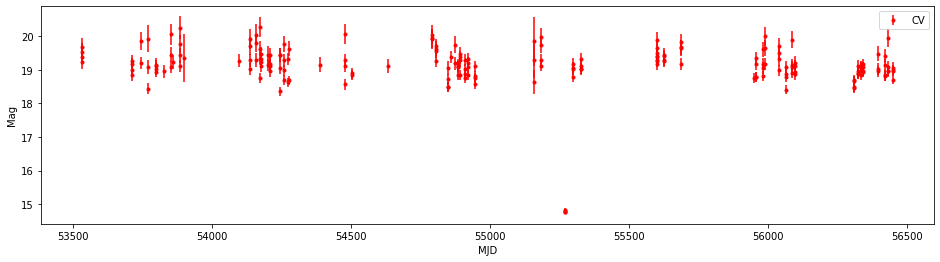

109 HPM TranID1502121630264101436


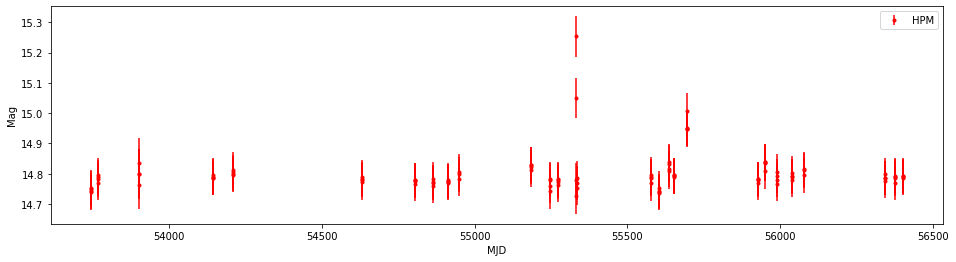

181 Blazar TranID1412231010584107248


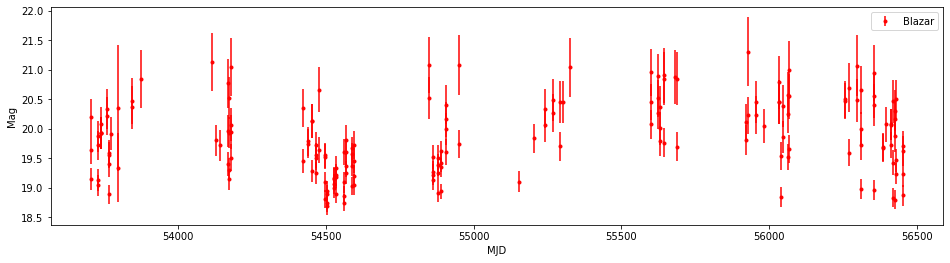

385 CV TranID904181120584134509


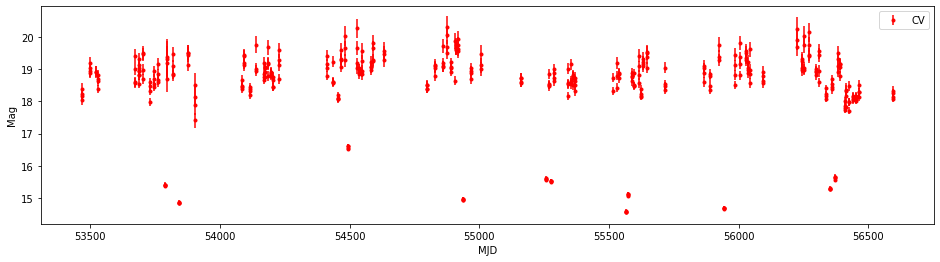

200 Flare TranID801180120604112518


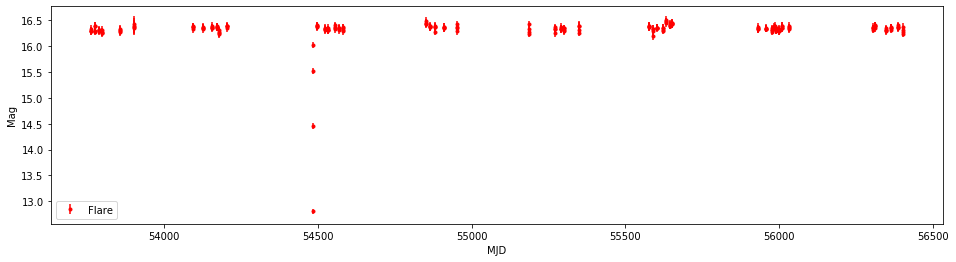

191 HPM TranID1201041460454138916


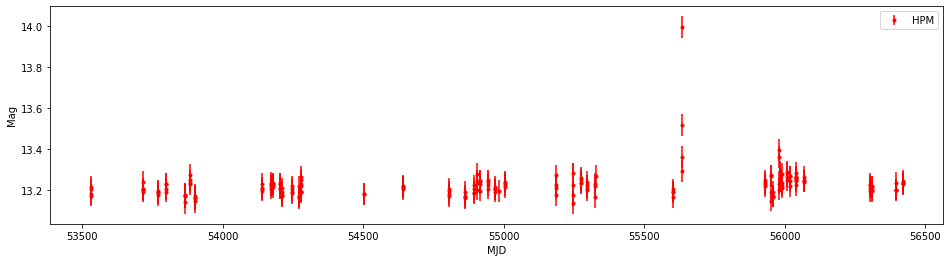

170 HPM TranID1504301520404124884


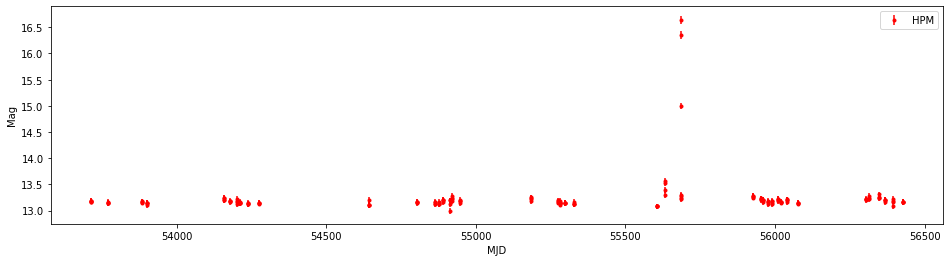

246 Flare TranID1306140090664120159


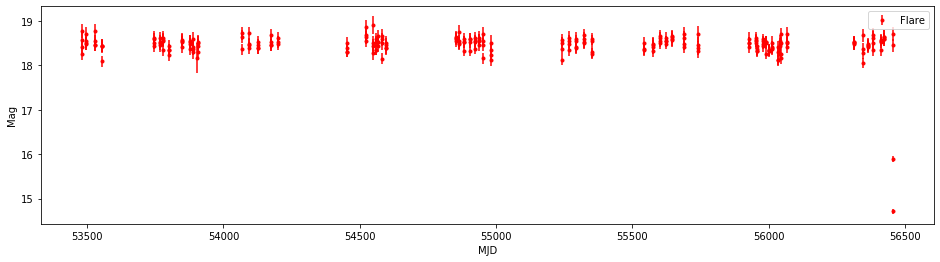

91 HPM TranID1606161600354121247


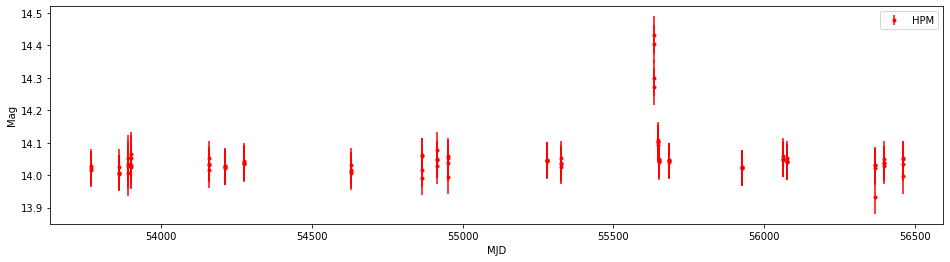

353 AGN TranID1004051040704109194


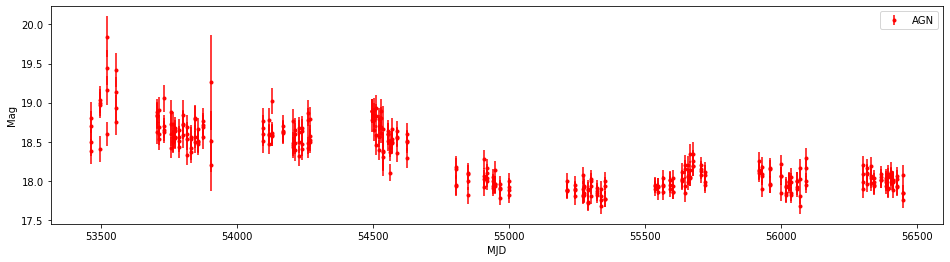

320 AGN TranID1201131350584118676


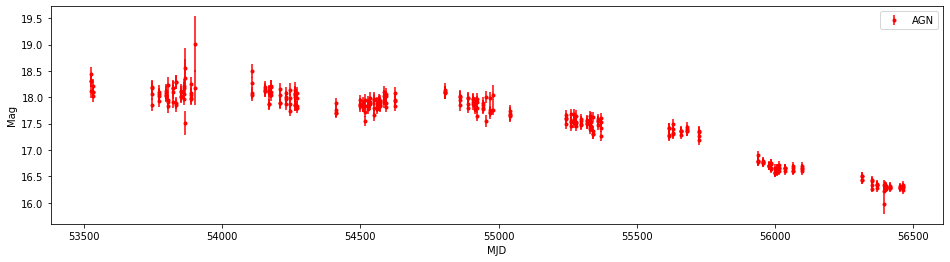

297 Flare TranID901280070704113394


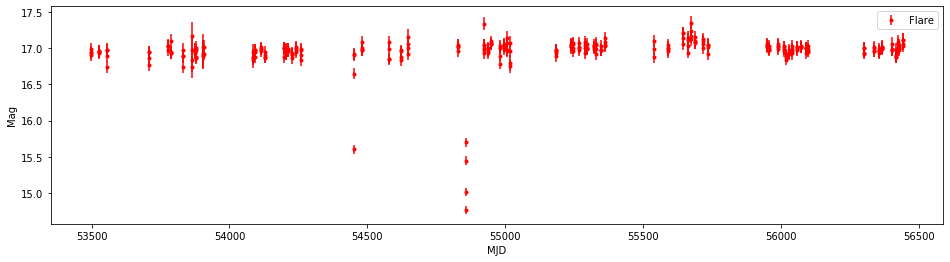

37 SN TranID1503170230654148655


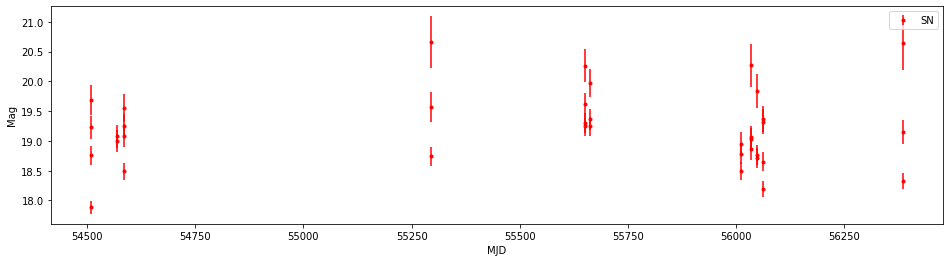

343 CV TranID802271010724123230


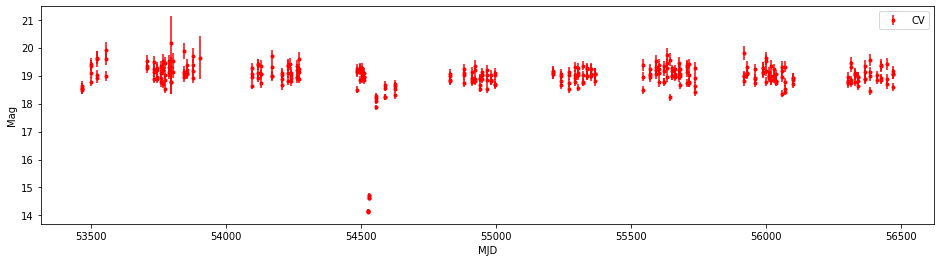

126 AGN TranID1003201460504104696


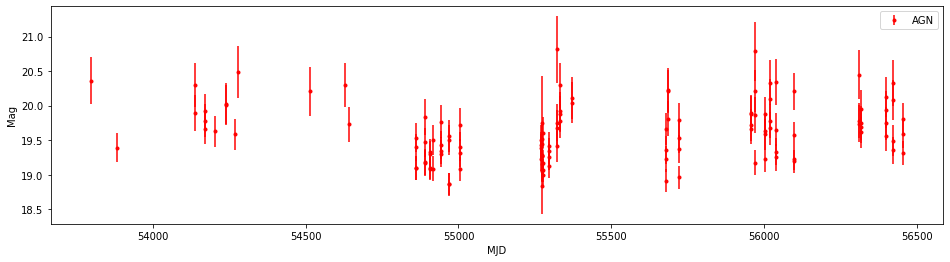

188 HPM TranID1204011460504139961


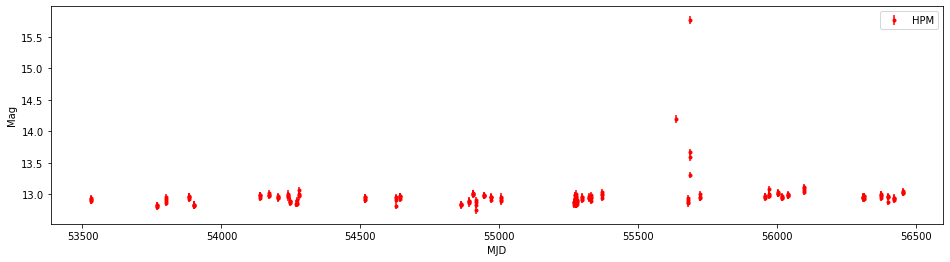

53 Unknown TranID1503261490484103204


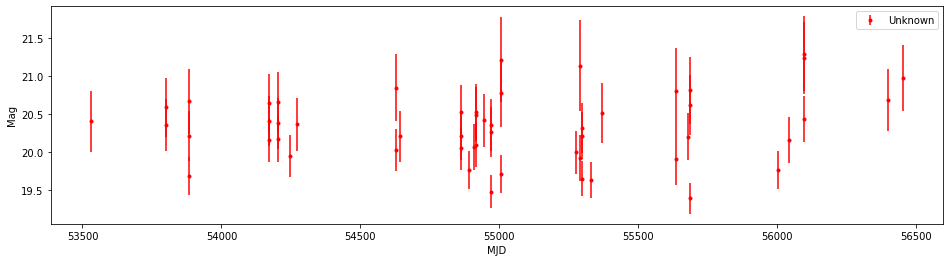

167 AGN/SN TranID1103130180704131543


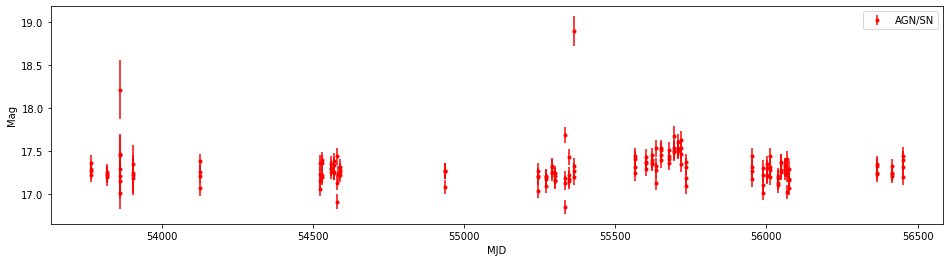

84 Blazar TranID1103290230684131567


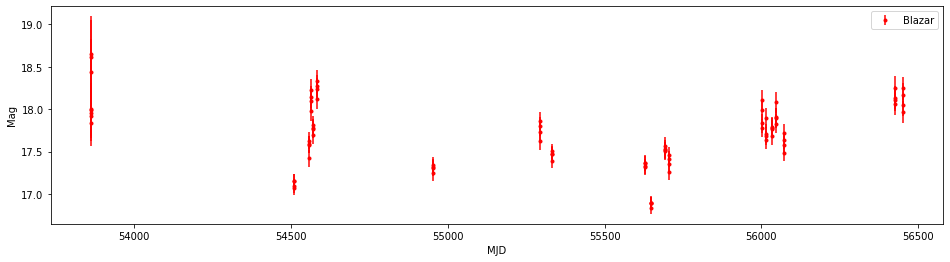

348 CV TranID1005311150714116242


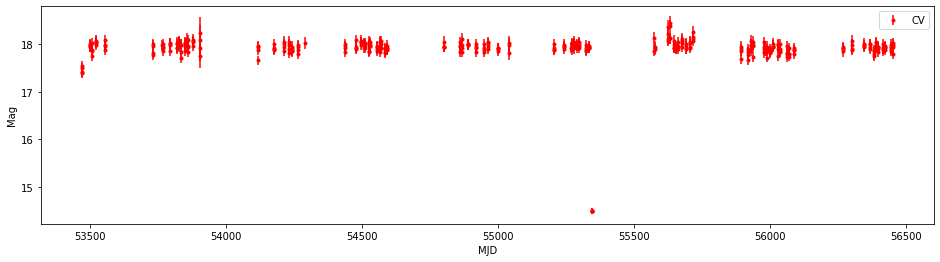

47 SN TranID902261320644130818


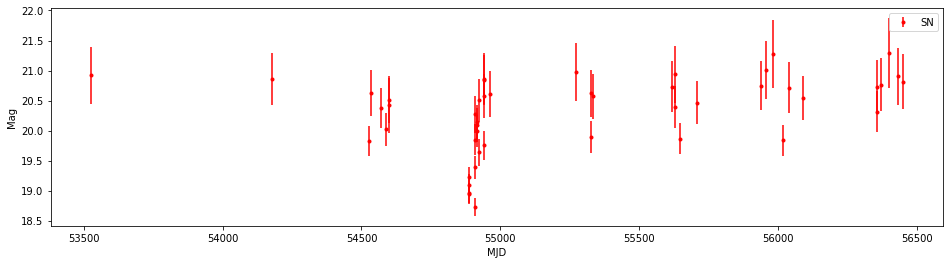

236 SN TranID1503211010754116328


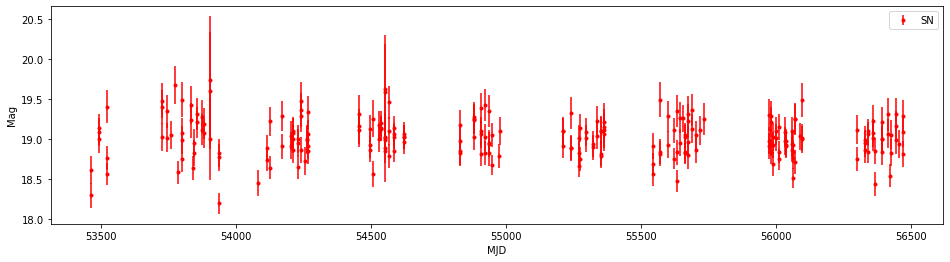

160 HPM TranID1204011460534140759


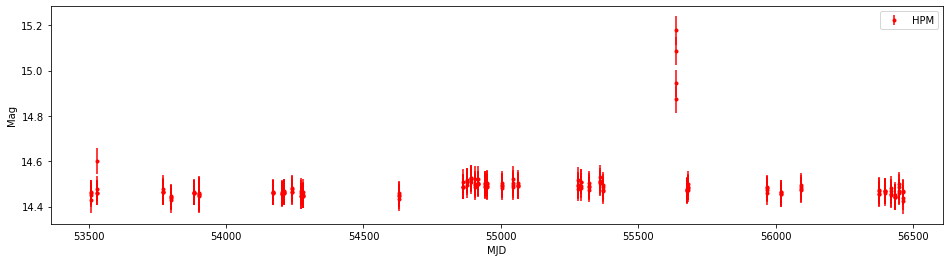

176 HPM TranID1304151460544143236


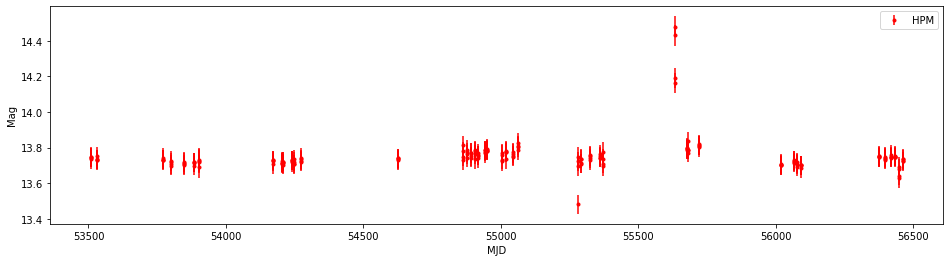

109 Blazar TranID907311380634104253


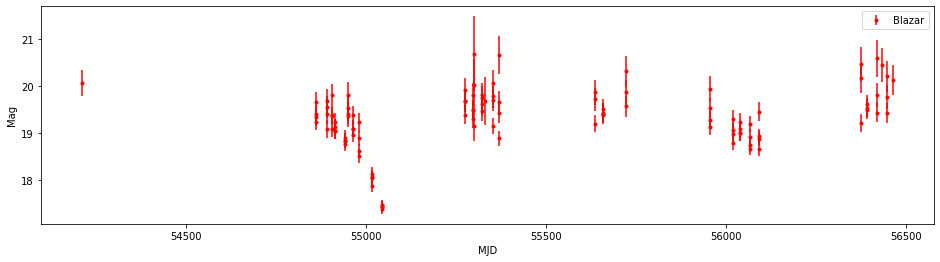

307 Flare TranID1205161380684113569


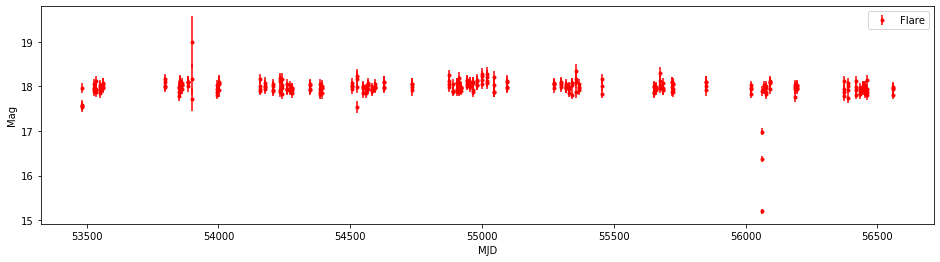

224 SN TranID1205171400634128595


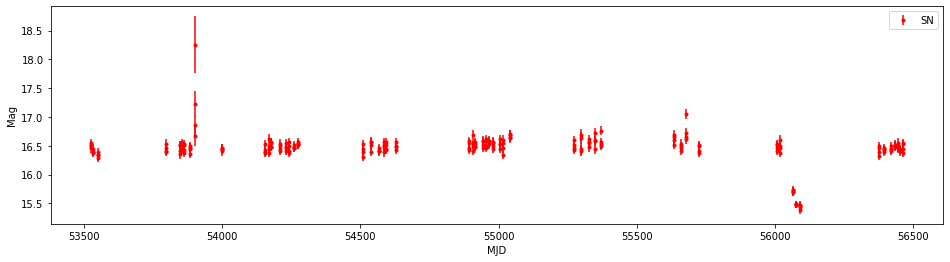

40 YSO TranID1205260230814129756


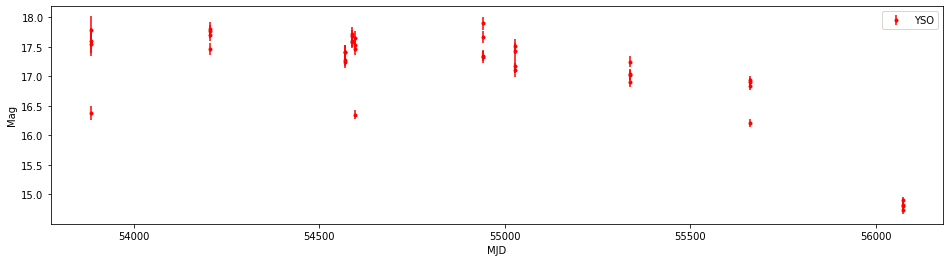

32 SN TranID1406021120904122625


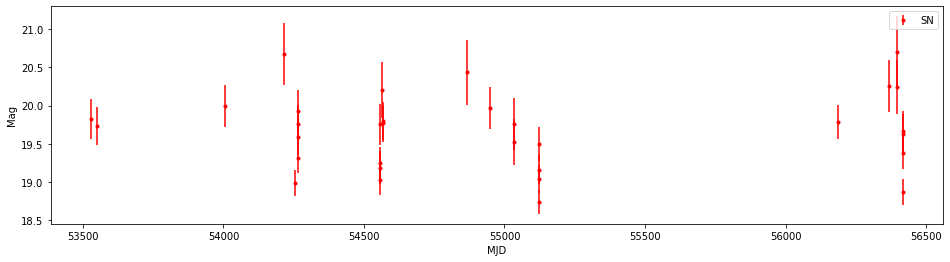

429 CV TranID1005131230814132089


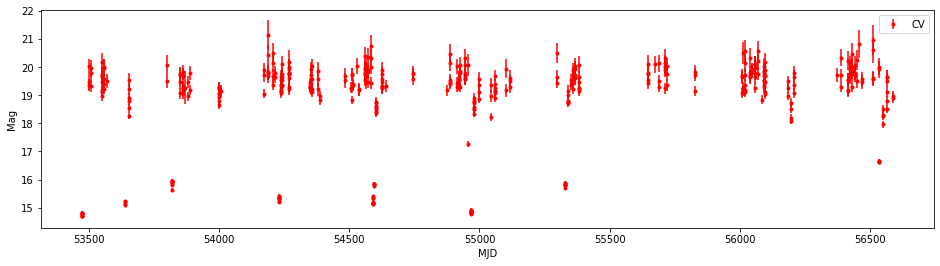

33 CV TranID1011160151074147665


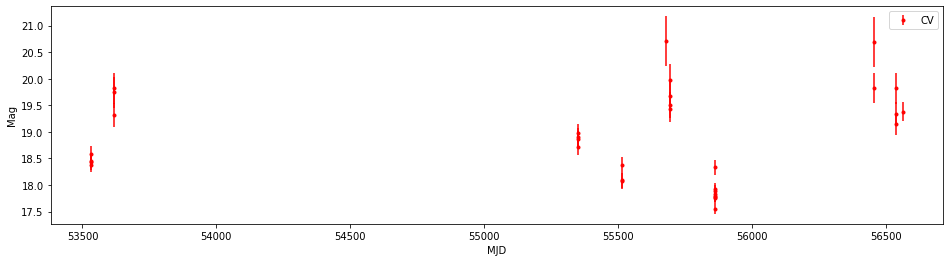

364 CV TranID711151400724125465


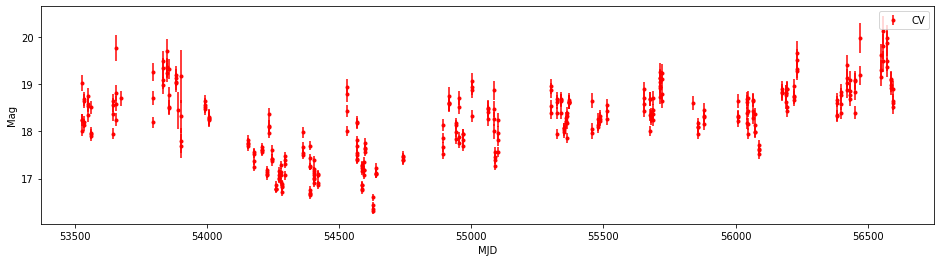

265 CV TranID1304181400734166981


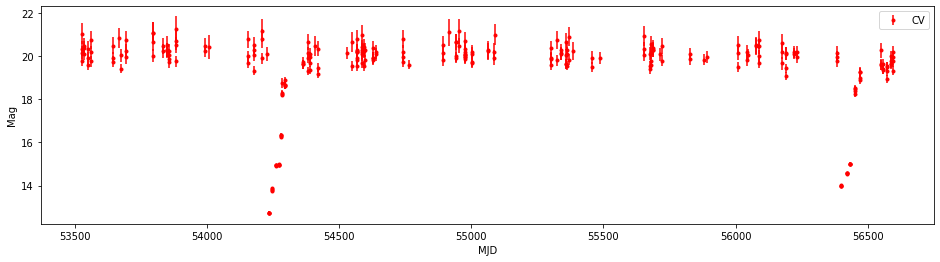

100 HPM TranID1609101690374137222


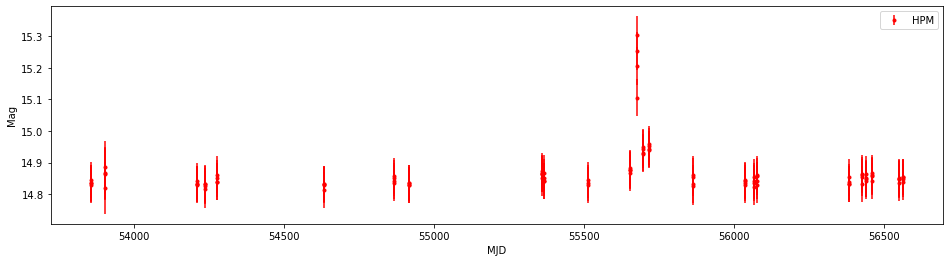

385 Carb TranID909121011184202267


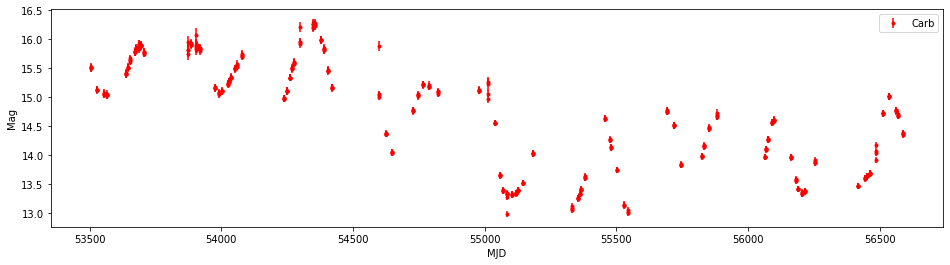

375 Flare TranID1209141181134129658


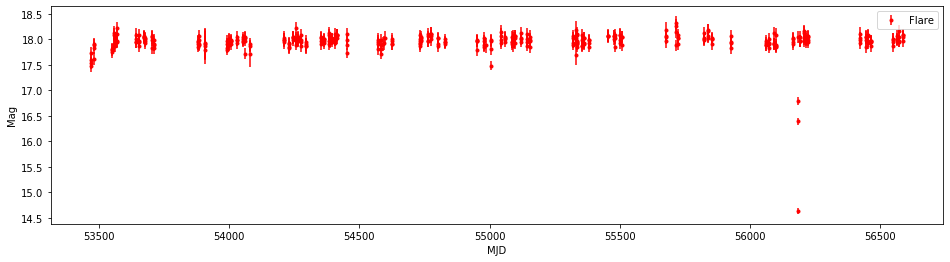

99 HPM TranID1010311350054106115


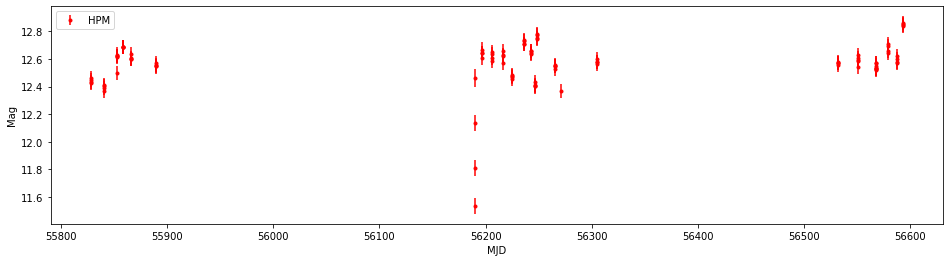

74 HPM TranID1509251350054106180


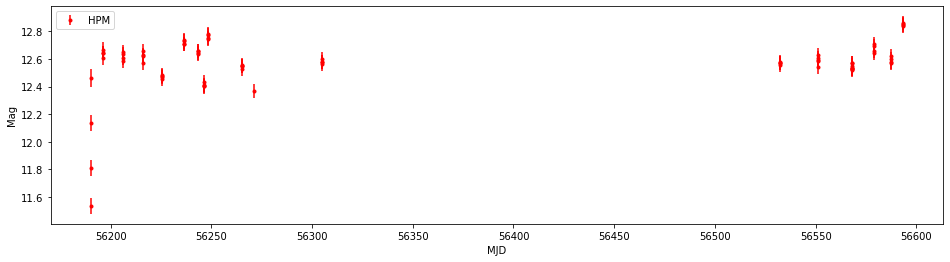

33 CV TranID1301311380344128824


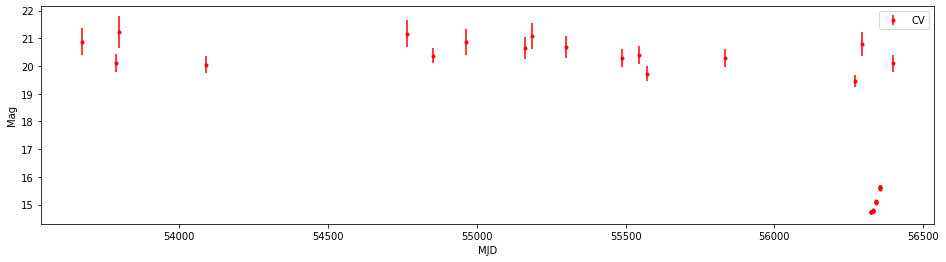

47 HPM TranID1603271150674120069


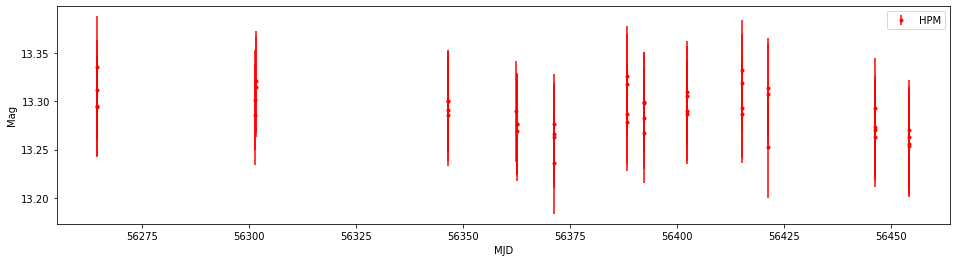

95 HPM TranID1403261180674133158


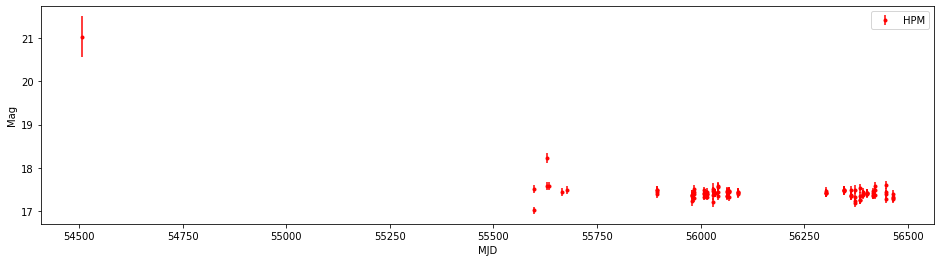

37 HPM TranID1602121460504144313


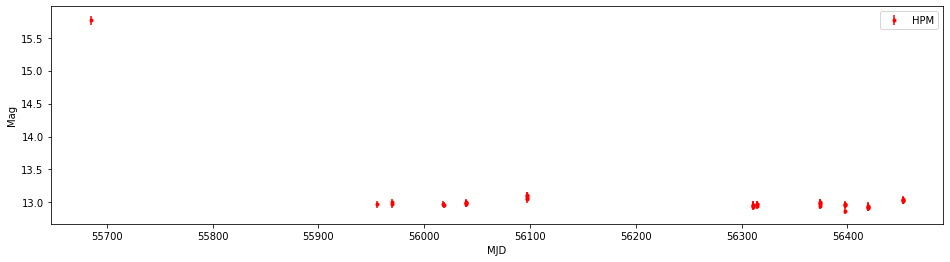

113 HPM TranID1001151040734114938


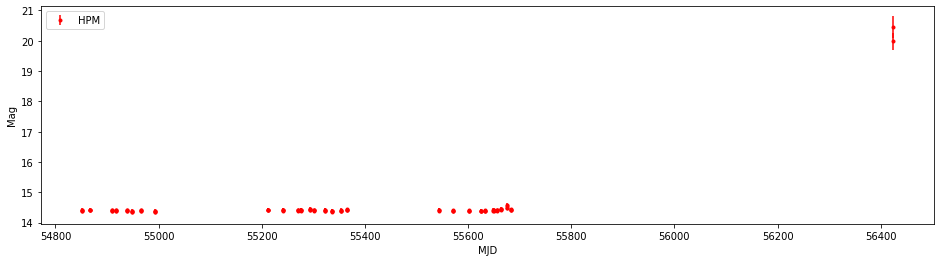

85 HPM TranID801311040734112057


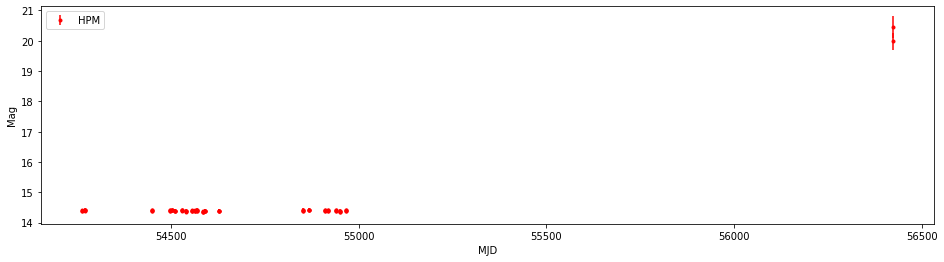

63 HPM TranID1602071460524126217


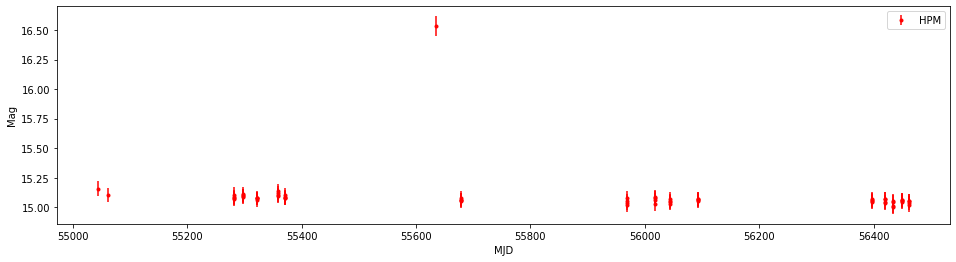

120 HPM TranID1206181230684113341


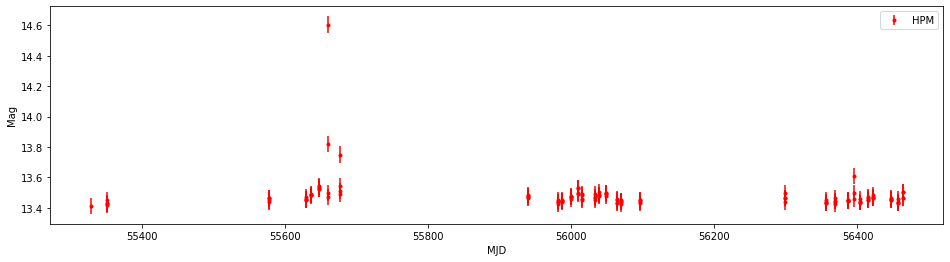

43 SN TranID1303071090774127988


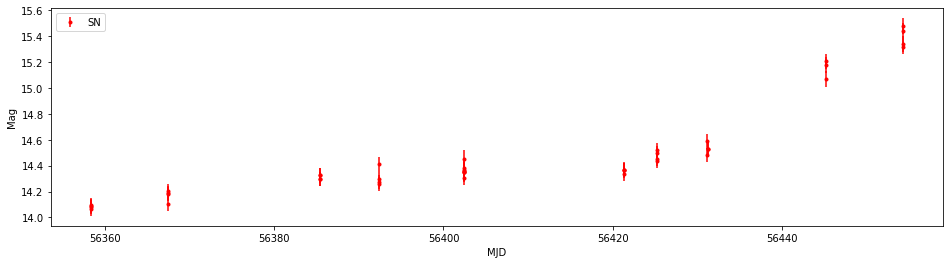

80 HPM TranID1401200150784129813


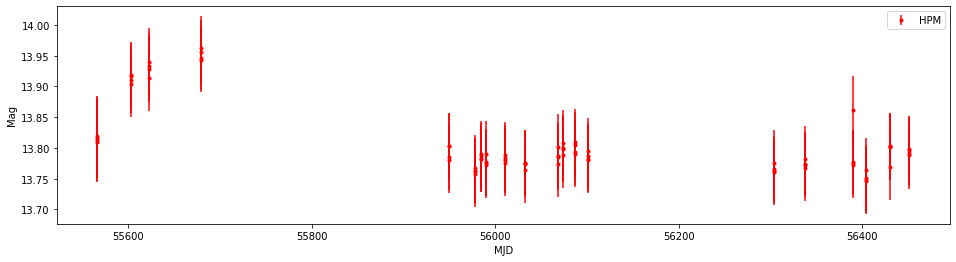

97 HPM TranID1201230150784136277


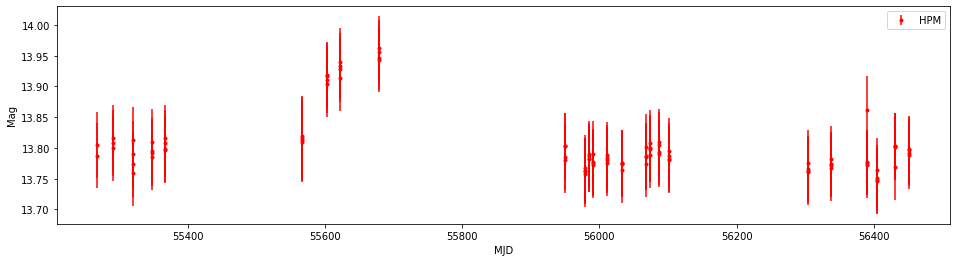

37 HPM TranID1604190070904103478


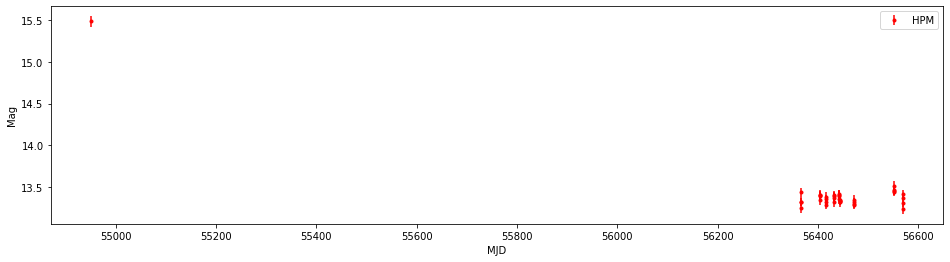

73 HPM TranID1506191071194103098


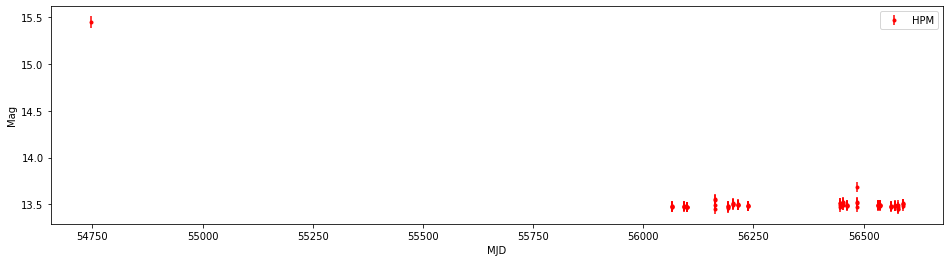

In [22]:
model=IsolationForest(n_estimators=400, max_samples='auto',max_features=1.0)
model.fit(X)

# Predicting the anomalies
ft_data['iforest'] = pd.Series(model.predict(X))
ft_data['iforest_Counts'] = ft_data['iforest'].map({1:0,-1:1})
# Counting the detected anomalies
print(ft_data['iforest'].value_counts())

# Analysing the predicted anomalies
pred=ft_data.loc[ft_data['iforest'] == -1]
for i in range(len(pred.ID)):
    
    
    plt.figure(figsize=(16,4))
    plt.xlabel('MJD')
    plt.ylabel('Mag')
    lc = transient_lc[transient_lc['ID']==pred.ID.iloc[i]]
    
    print(len(lc),pred.Class.iloc[i],pred.ID.iloc[i])
    plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label=pred.Class.iloc[i])
    plt.legend()
    plt.show()

In [36]:
# Getting information about the top ten detected anomalous objects

inf=transient_info.loc[transient_info['CSS_images'] == 1205260230814129756]

# transient_info

inf

,CRTS_ID,RA,Dec,UT_Date,Mag,CSS_images,SDSS,Others,Followed,Last,LC,FC,Classification
4592,CSS120526:162637-241554,246.65357,-24.26497,20120526.35,14.9,1205260230814129756,no,12975,yes,2016-05-16,12975,yes,YSO 2MASS_J16263682-2415518


In [23]:
# count = 0

# for i in range(len(pred.ID)):
    
#     lc = transient_lc[transient_lc['ID']==pred.ID.iloc[i]]
    
#     if len(lc)<10:
        
#         count += 1
    
# #     print('perriod_fit=',round(pred.Period_fit.iloc[i],2),'  #points',len(lc),pred.Class.iloc[i])
        
#     else:  
        
#         print('perriod_fit=',round(pred.Period_fit.iloc[i],2),'  #points',len(lc),pred.Class.iloc[i])
        
# #         print('perriod_fit=',round(pred.Period_fit.iloc[i],2),'  #points',len(lc))


# #     lc = transient_lc[transient_lc['ID']=='TranID1609221010114117243']
# #     plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label=pred.Class.iloc[i])
# #     plt.legend(fontsize=12)
# #     plt.xlabel('MJD')
# #     plt.ylabel('Mag')
# #     plt.show()

# Isolation forest Machine Learning 10 points cut

In [274]:
# Reading in the feature.csv data
ft_data = pd.read_csv('features10.csv',skiprows=1,names= ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
                                                  'CAR_sigma', 'Con', 'Eta_e', 'Freq1_harmonics_rel_phase_1',
                                                  'LinearTrend', 'MaxSlope', 'Mean', 'Period_fit', 
                                                  'SlottedA_length','SmallKurtosis', 'StructureFunction_index_21'
                                                  ,'ID'])


ft_data.head()

params = ['Amplitude','AndersonDarling', 'Autocor_length','Beyond1Std','CAR_sigma','Con',
          'Eta_e','Freq1_harmonics_rel_phase_1','LinearTrend','MaxSlope','Mean', 
          'SlottedA_length', 'SmallKurtosis','StructureFunction_index_21']

X = ft_data[params]

# X[X==np.inf]=np.nan



#Handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(X)
X = imputer.transform(X)

In [276]:
# # Adding the class column to the feature data
# classs = []
# for i in range(len(ft_data)):
    
#     for j in range(len(class_data.Class)):
        
#         if class_data.ID.iloc[j] == ft_data.ID.iloc[i]:
            
#             classs.append(class_data.Class.iloc[j])
            
# ft_data['Class'] = classs

In [280]:
# Reading in the data

ft_data = pd.read_csv('features10.csv',skiprows=1,names= ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
                                                  'CAR_sigma', 'Con', 'Eta_e', 'Freq1_harmonics_rel_phase_1',
                                                  'LinearTrend', 'MaxSlope', 'Mean', 'Period_fit', 
                                                  'SlottedA_length','SmallKurtosis', 'StructureFunction_index_21'
                                                  ,'ID'])


# Adding the class column to the feature data
classs = []
for i in range(len(ft_data)):
    
    for j in range(len(class_data.Class)):
        
        if class_data.ID.iloc[j] == ft_data.ID.iloc[i]:
            
            classs.append(class_data.Class.iloc[j])
            
ft_data['Class'] = classs




# Getting the parameters for the model
params = ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
                                                  'CAR_sigma', 'Con', 'Eta_e', 'Freq1_harmonics_rel_phase_1',
                                                  'LinearTrend', 'Mean', 
                                                  'SlottedA_length','SmallKurtosis', 'StructureFunction_index_21']


# X data
X = ft_data[params]
#Handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(X)
X = imputer.transform(X)
# print(X)

 1    6883
-1     213
Name: iforest, dtype: int64
13 SN?


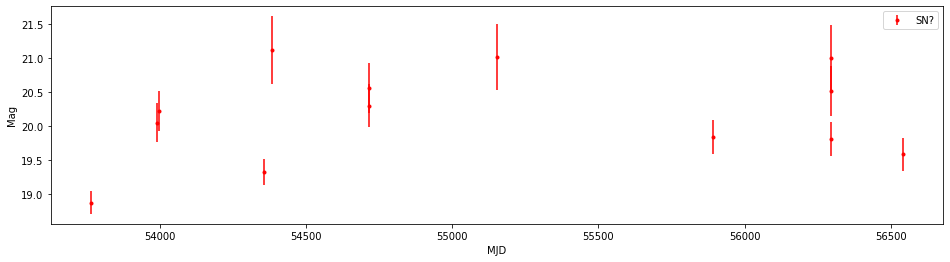

288 Blazar


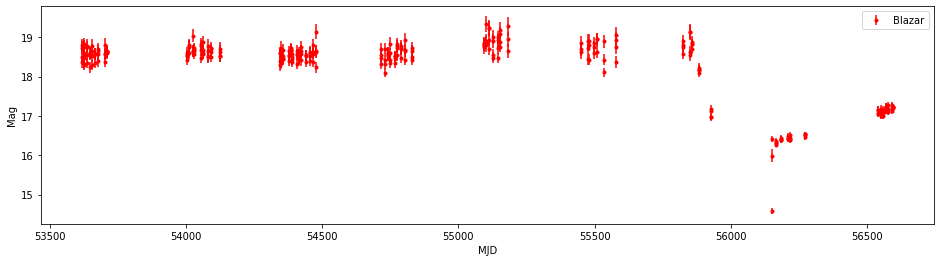

13 SN?


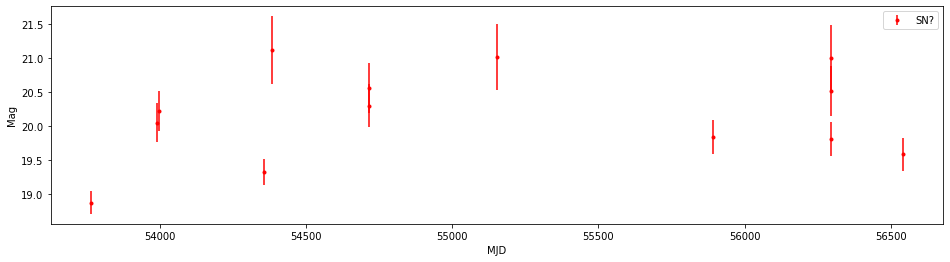

13 SN?


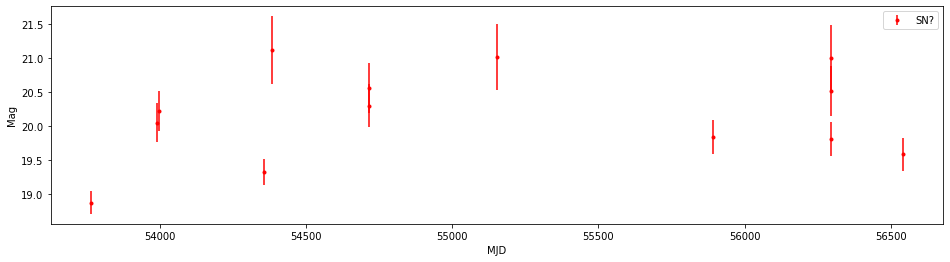

288 Blazar


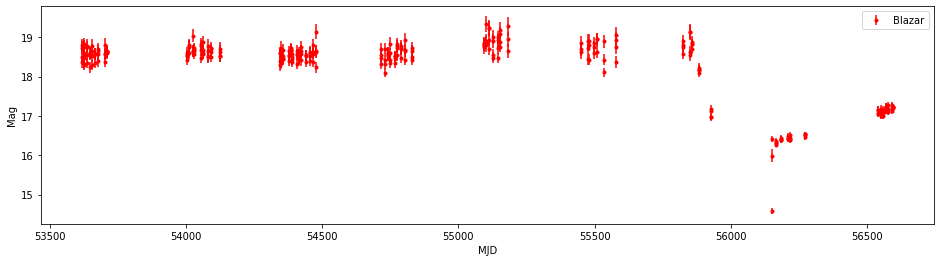

14 CV


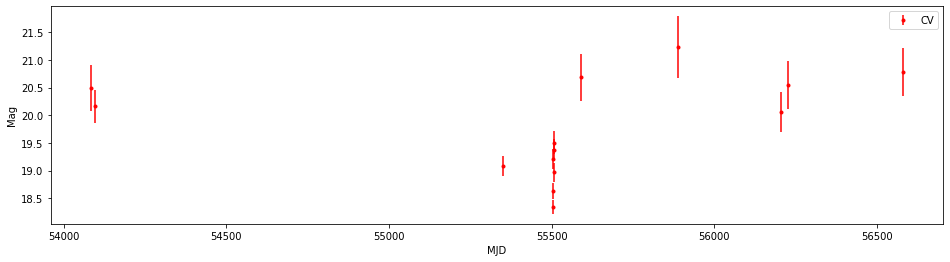

142 CV


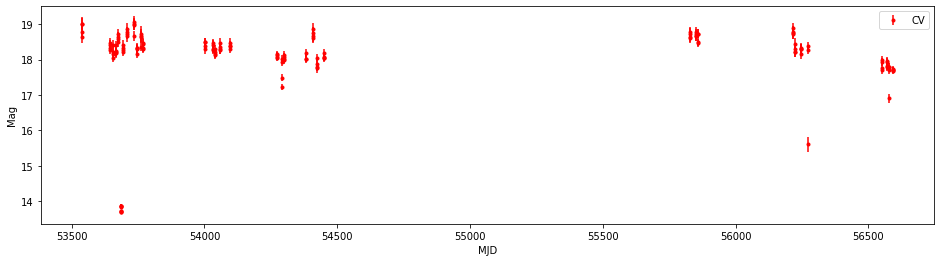

12 SN


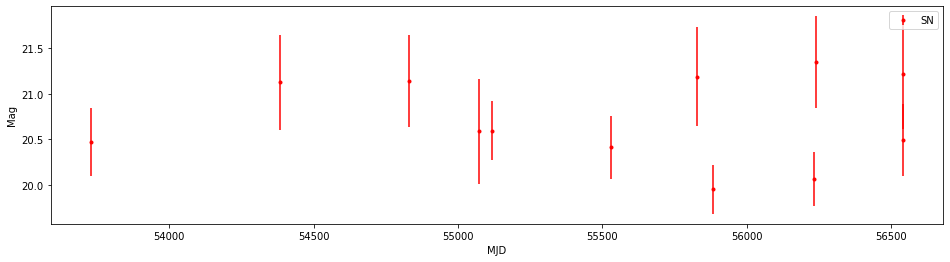

264 CV


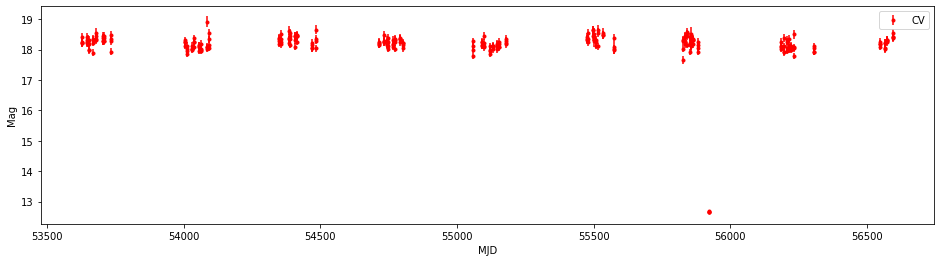

299 Flare


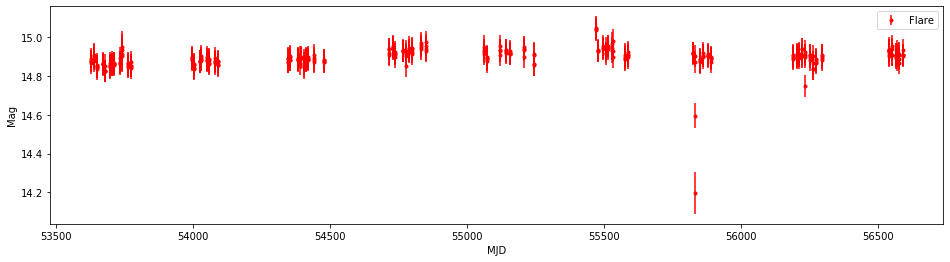

331 Flare


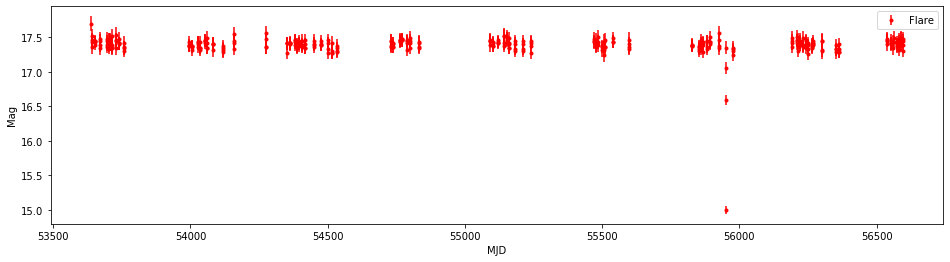

348 Flare


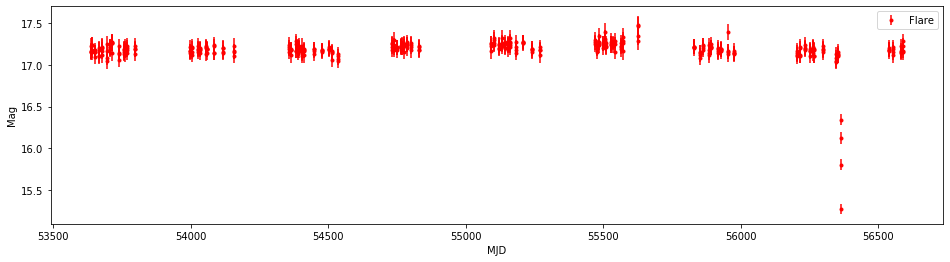

225 Carb


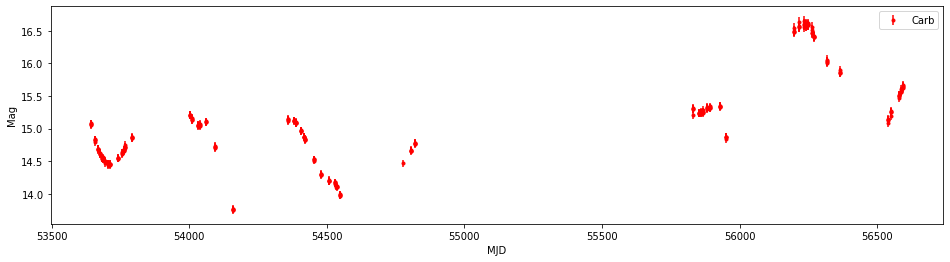

305 HPM


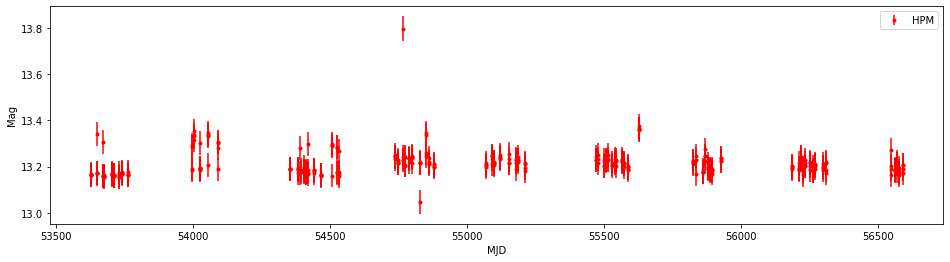

32 CV


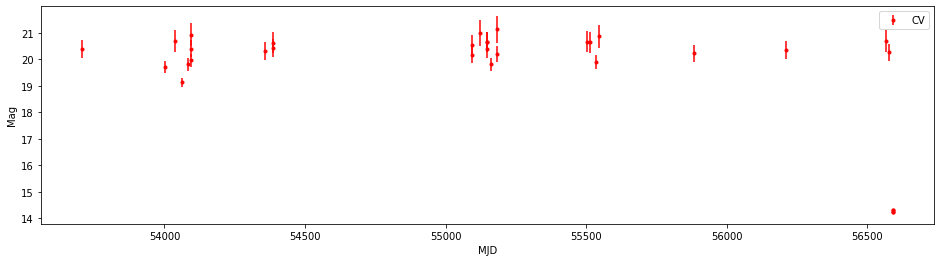

328 O/Ne


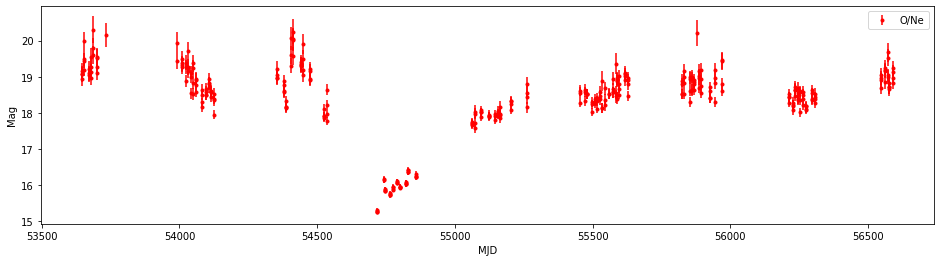

359 CV


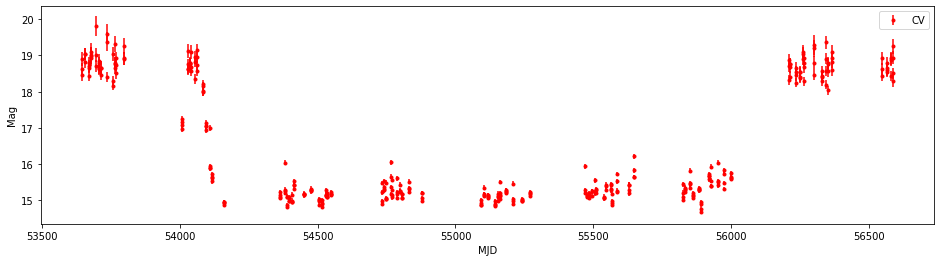

360 Flare


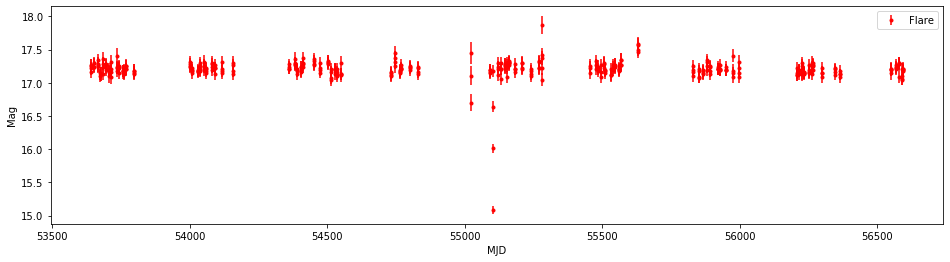

11 CV/SN


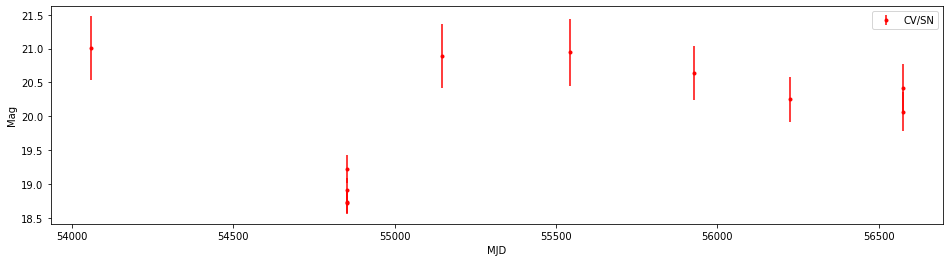

345 Flare


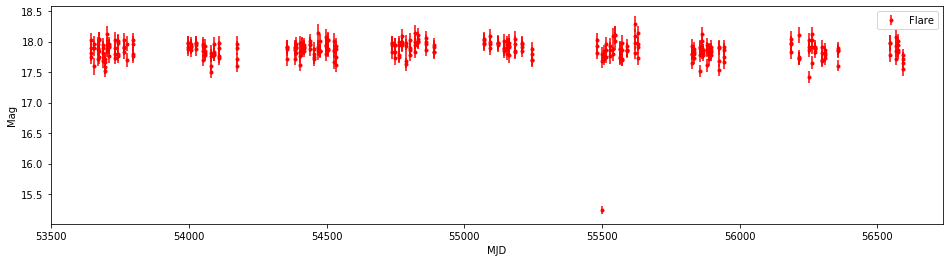

17 CV


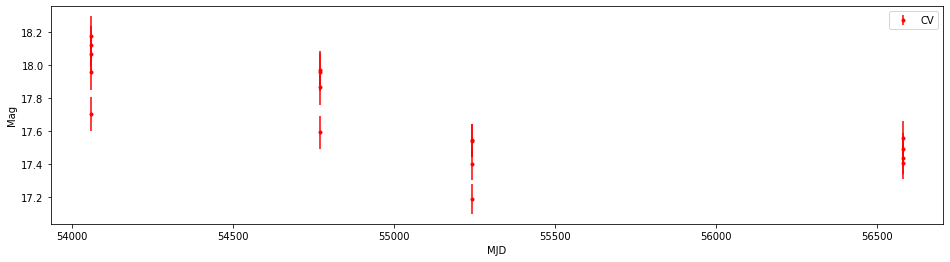

39 CV


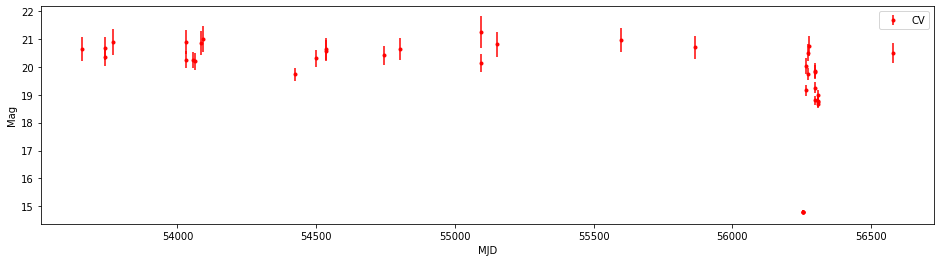

231 Flare


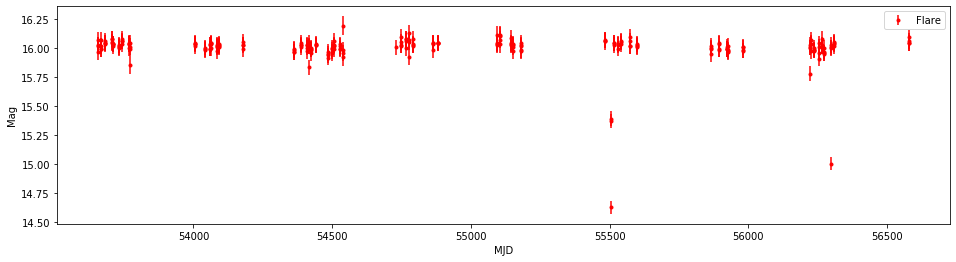

43 CV?


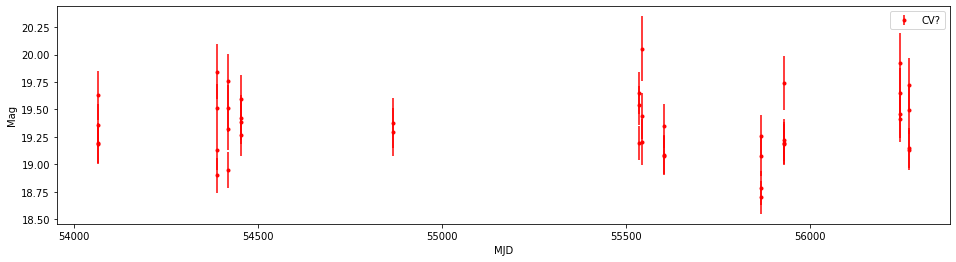

372 Var


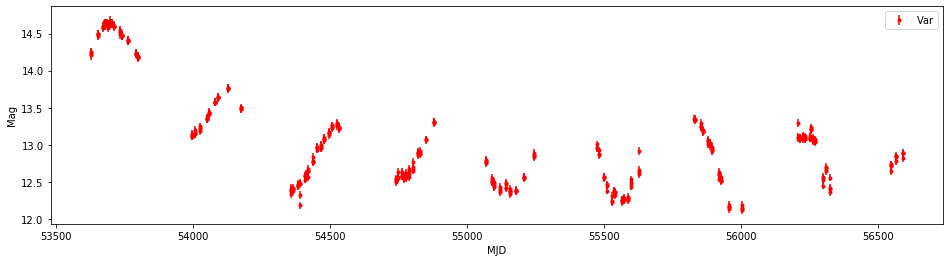

330 Flare


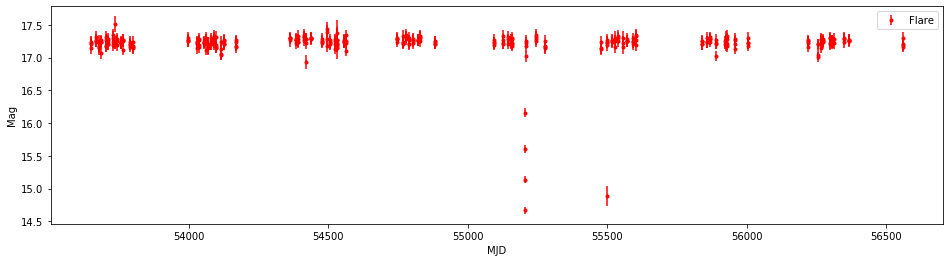

410 CV


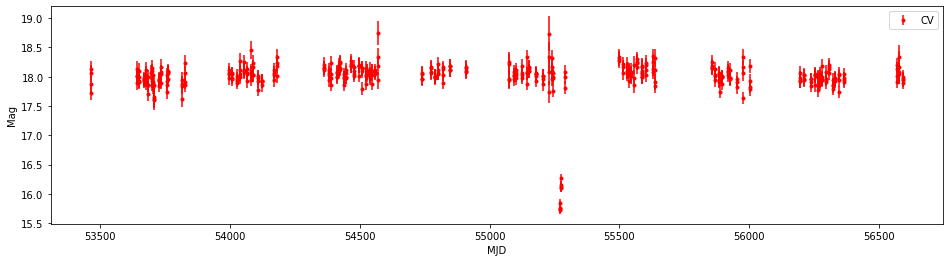

159 Mira


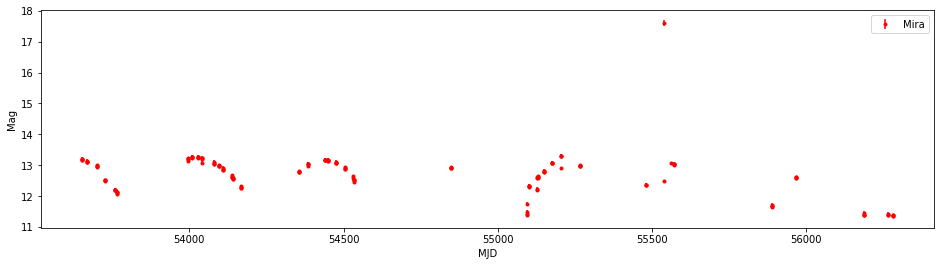

12 CV?


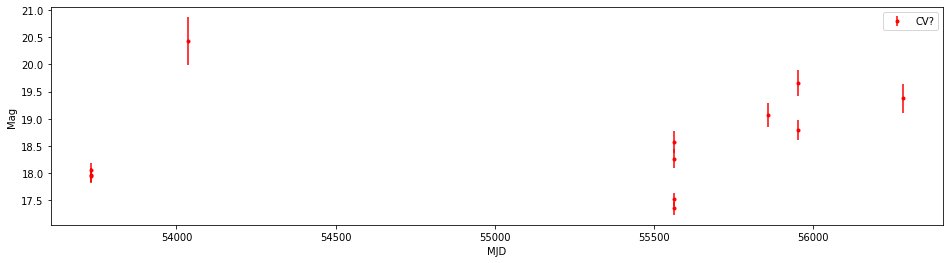

101 HPM


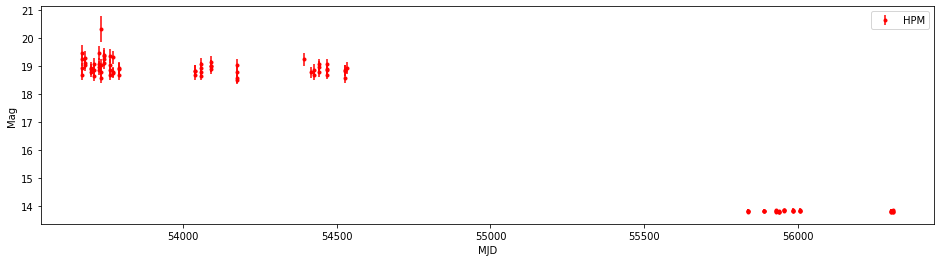

111 YSO?


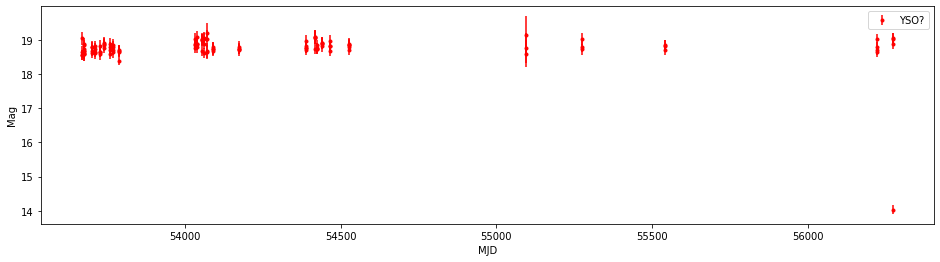

103 LPV


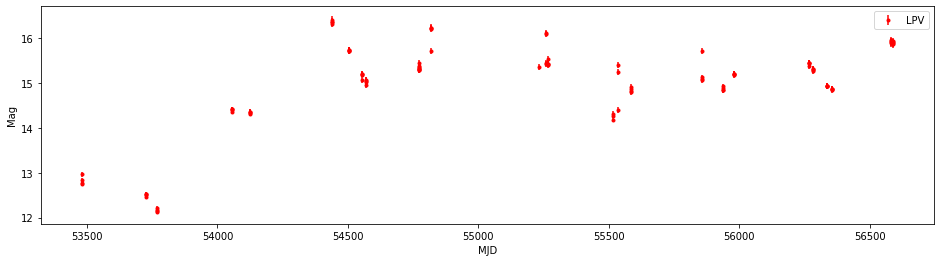

492 CV


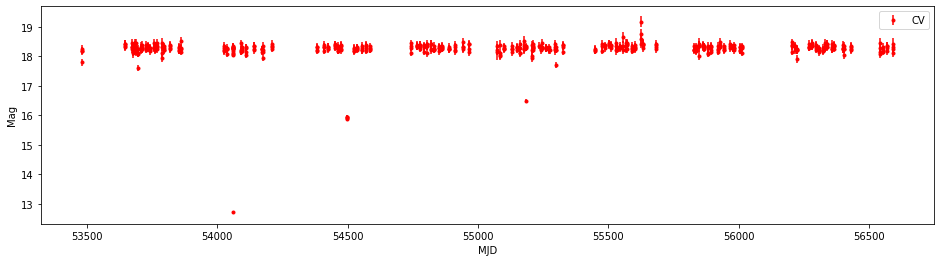

247 CV


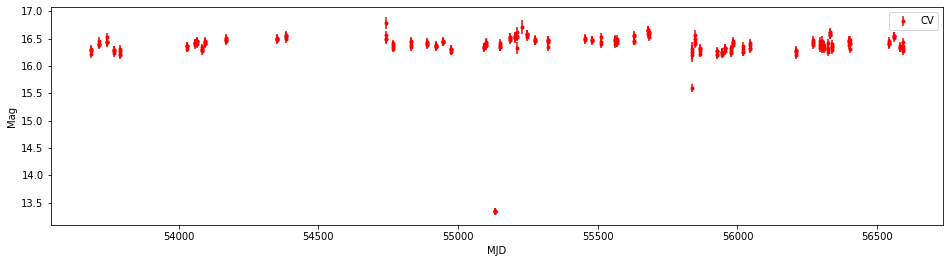

323 Flare


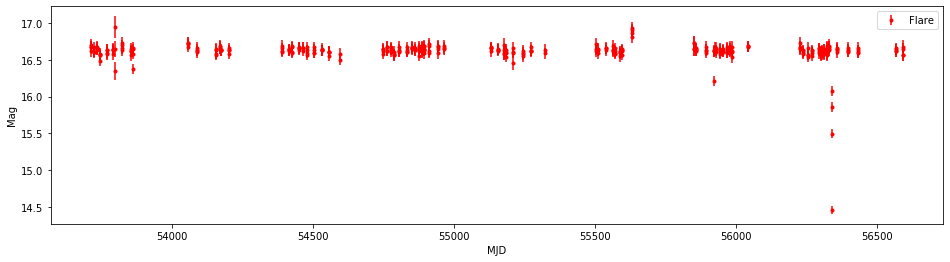

141 HPM


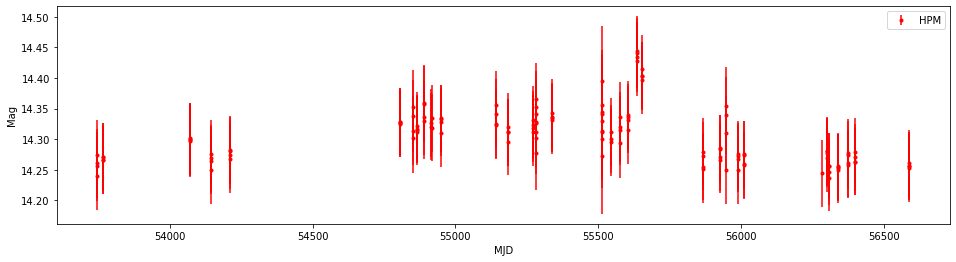

42 CV


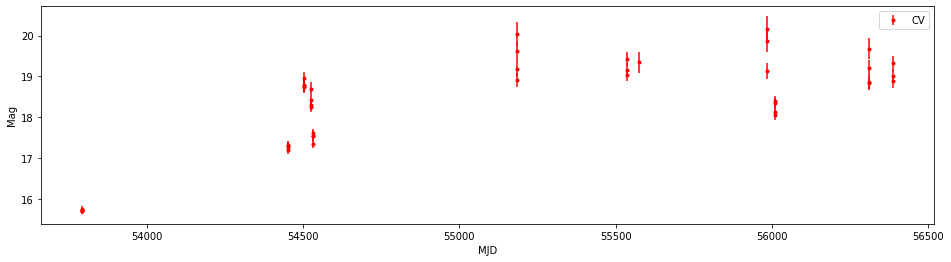

259 Flare


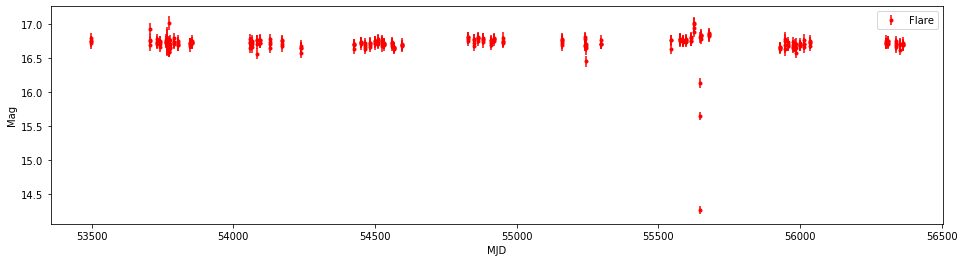

21 Blazar


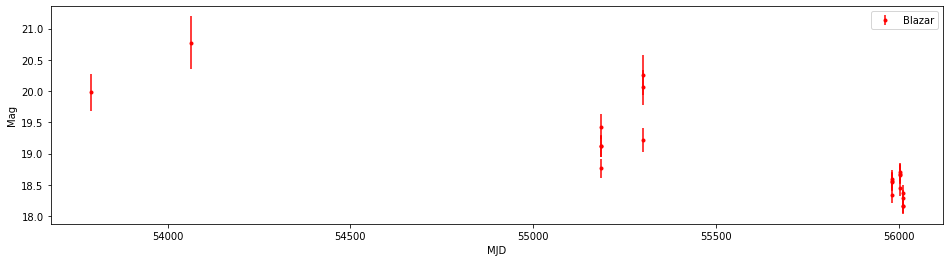

17 SN


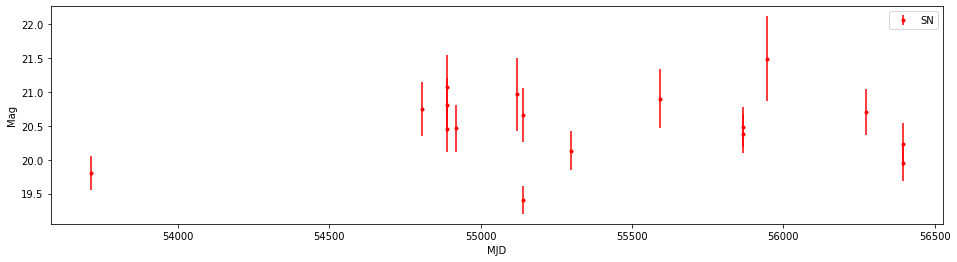

383 Flare


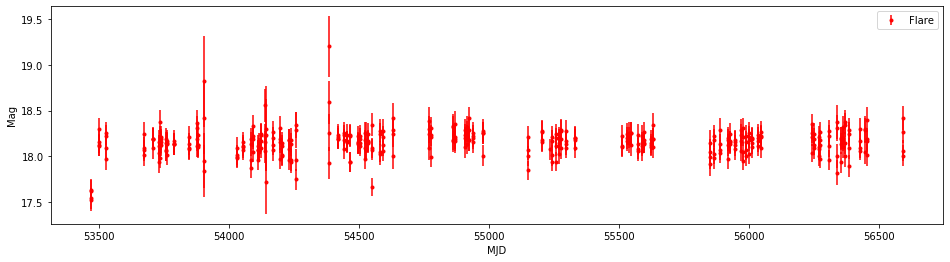

20 SN?


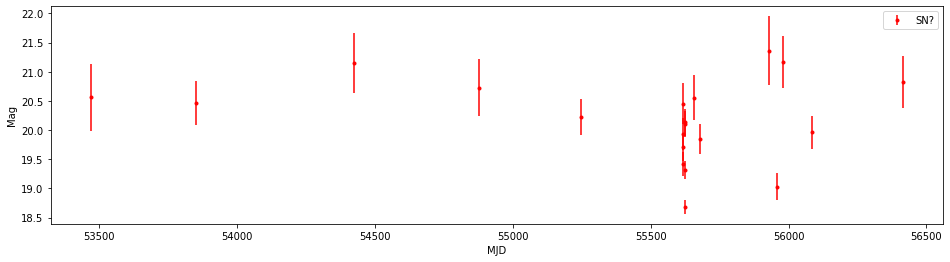

333 SN


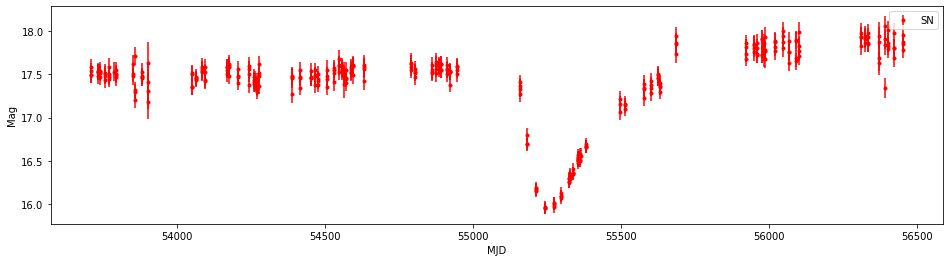

109 HPM


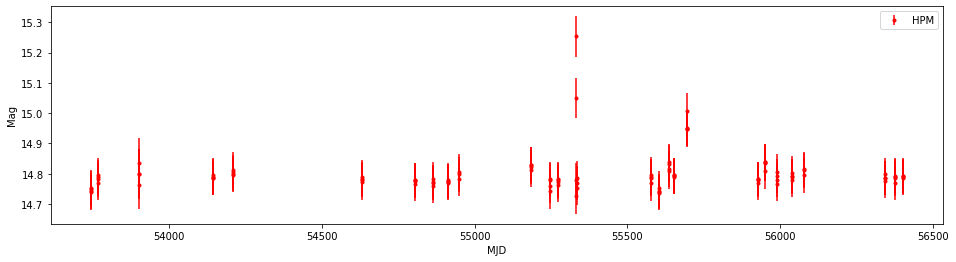

46 CV


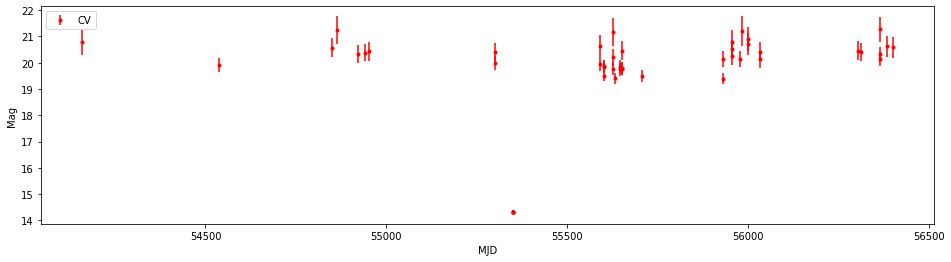

200 Flare


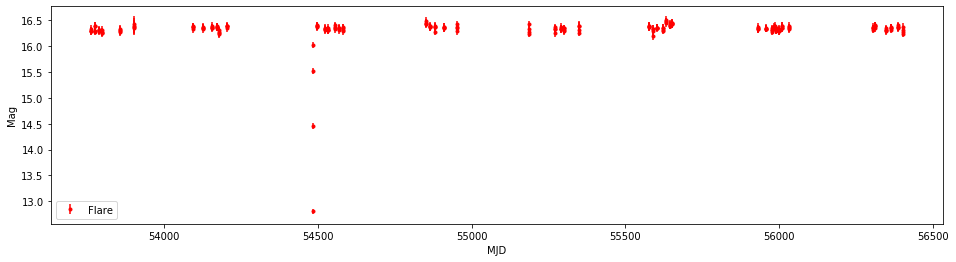

96 Blazar


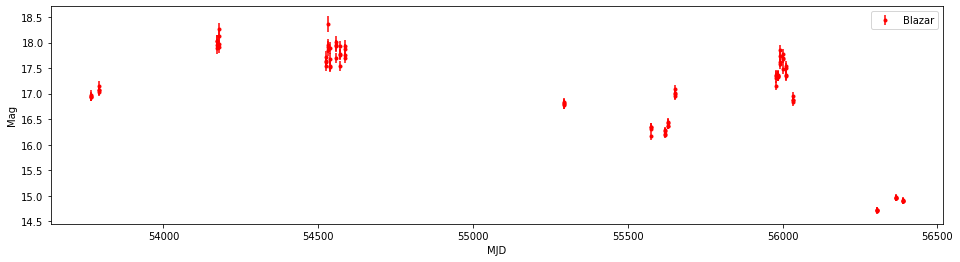

272 CV


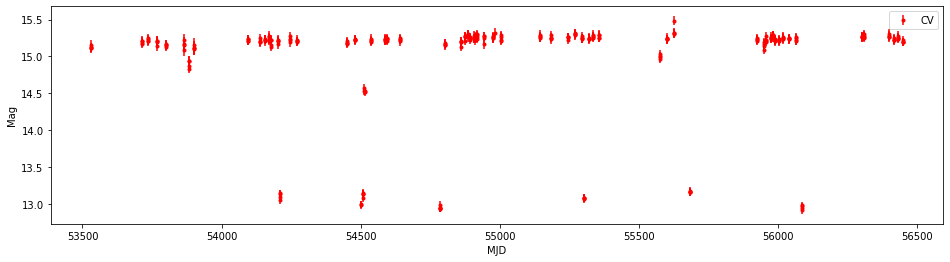

15 SN


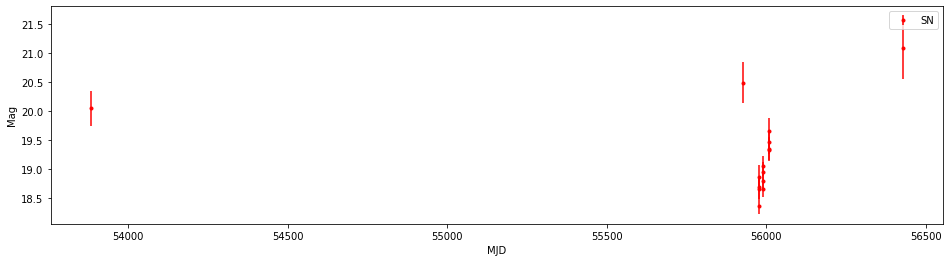

28 SN


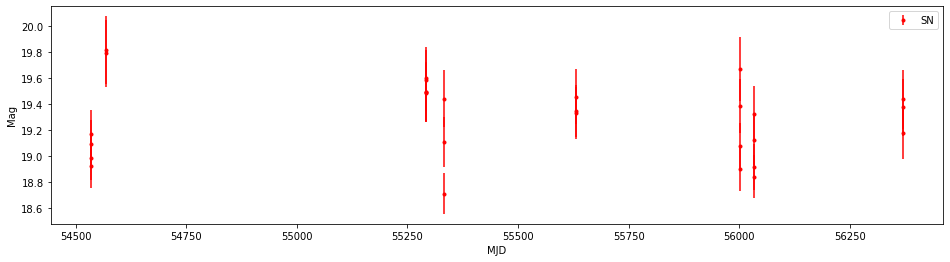

13 SN


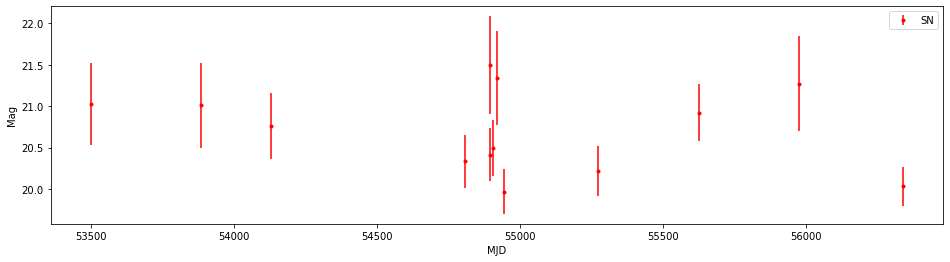

11 SN


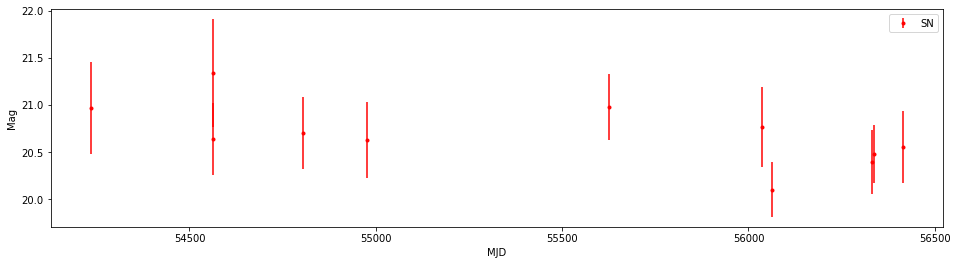

191 HPM


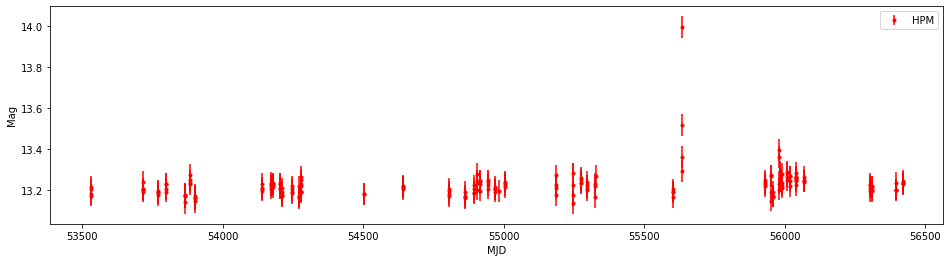

170 HPM


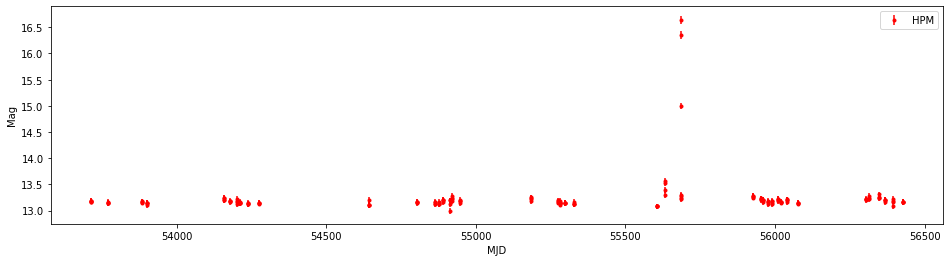

246 Flare


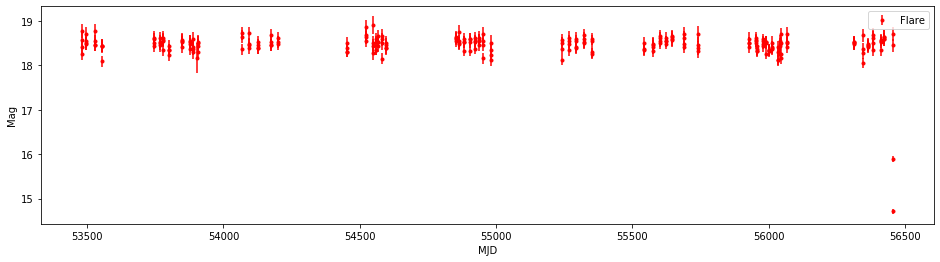

13 SN?


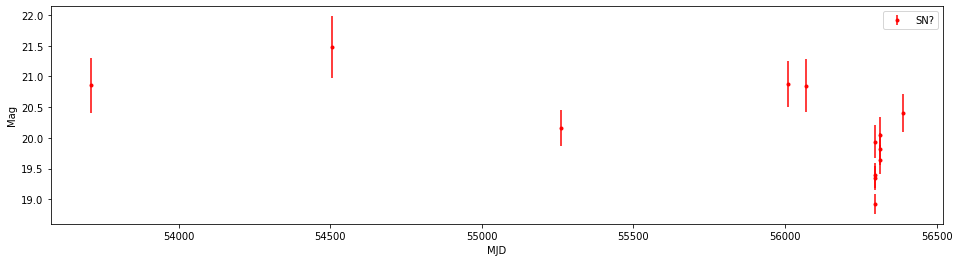

91 HPM


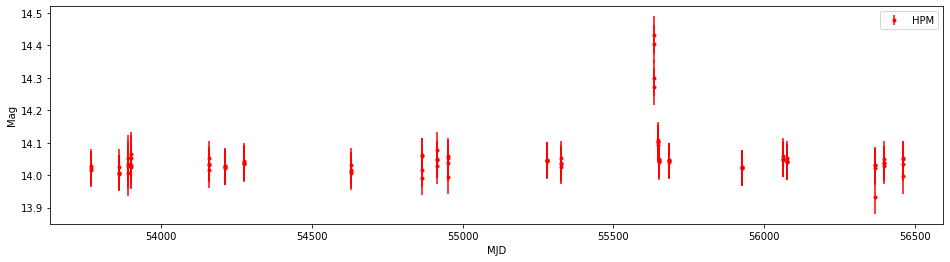

77 HPM


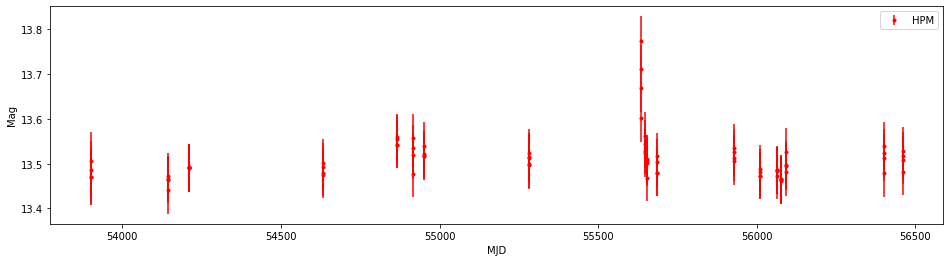

297 Flare


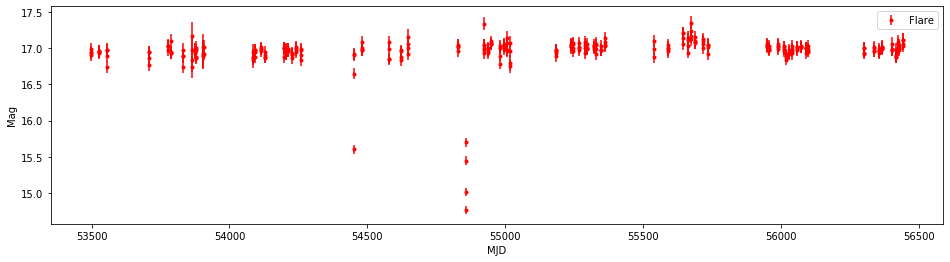

188 HPM


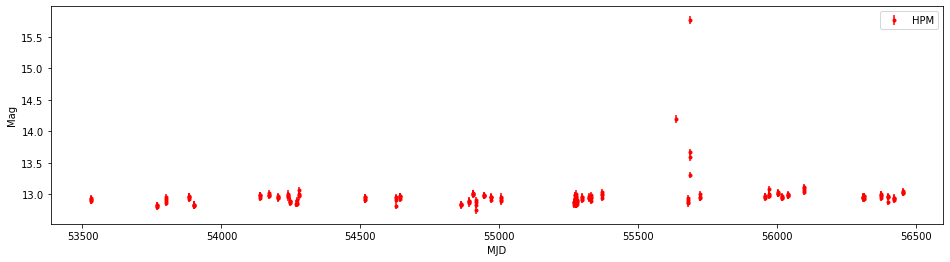

84 Blazar


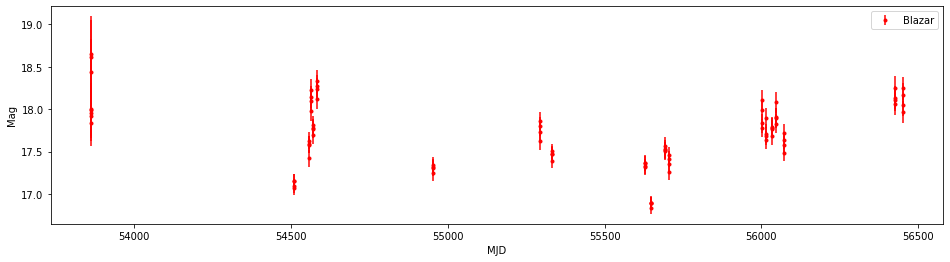

348 CV


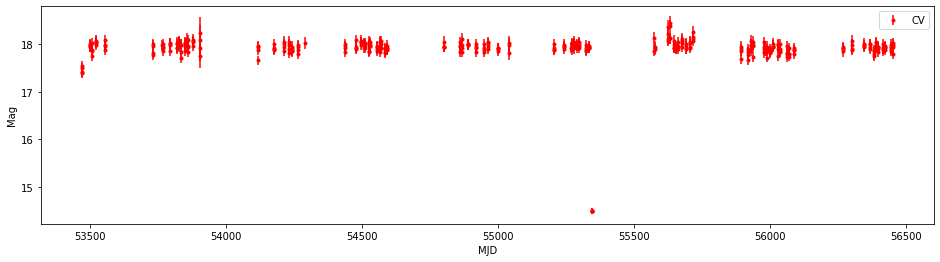

47 SN


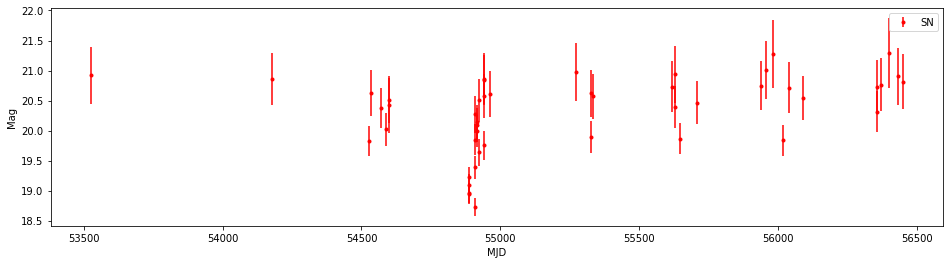

160 HPM


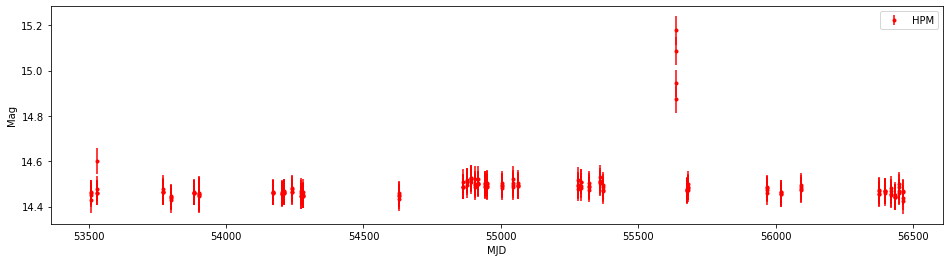

176 HPM


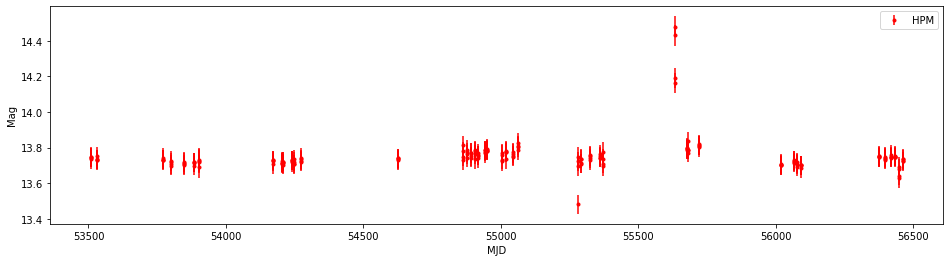

23 SN


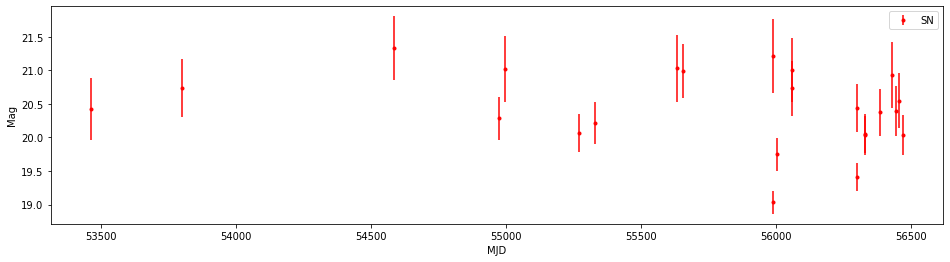

14 SN?


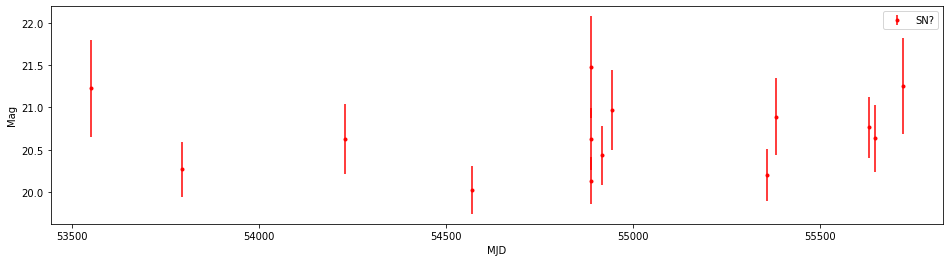

364 CV


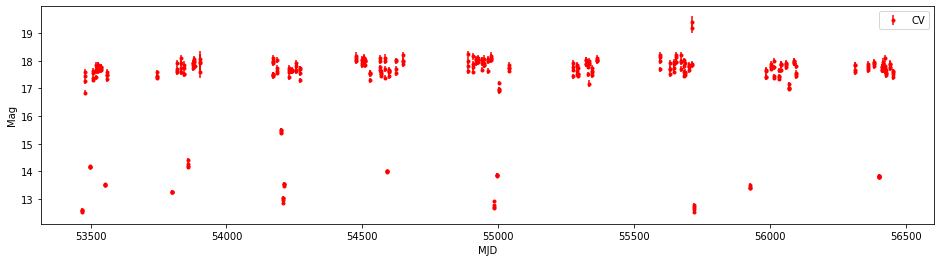

11 SN


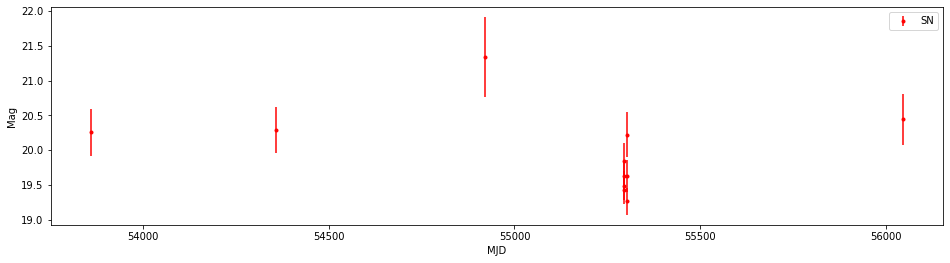

224 SN


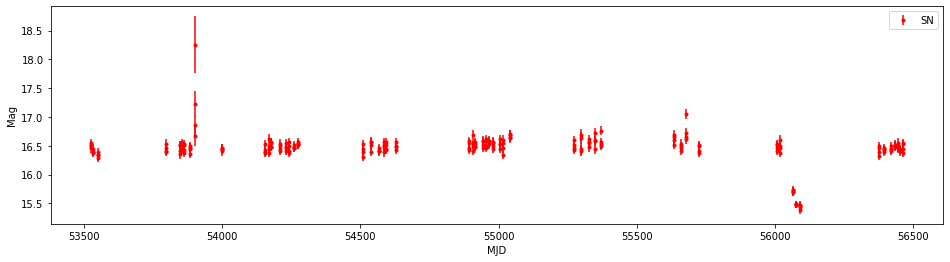

40 YSO


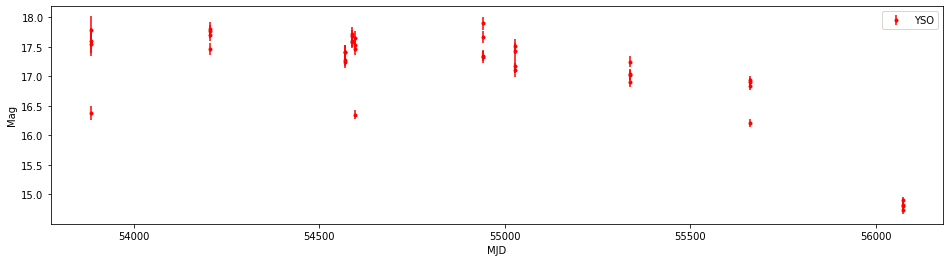

62 CV


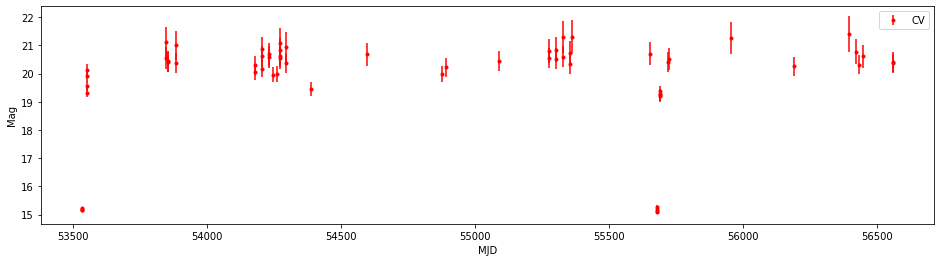

28 CV


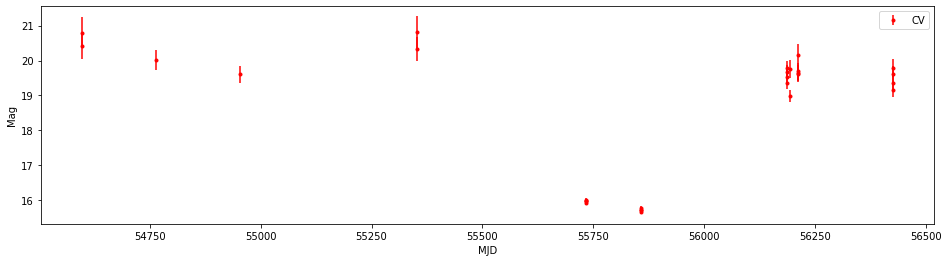

33 CV


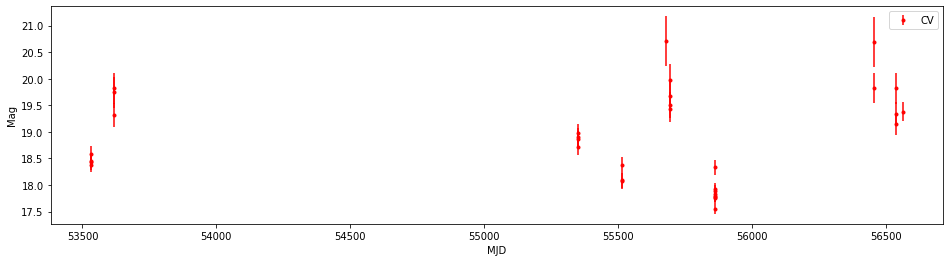

265 CV


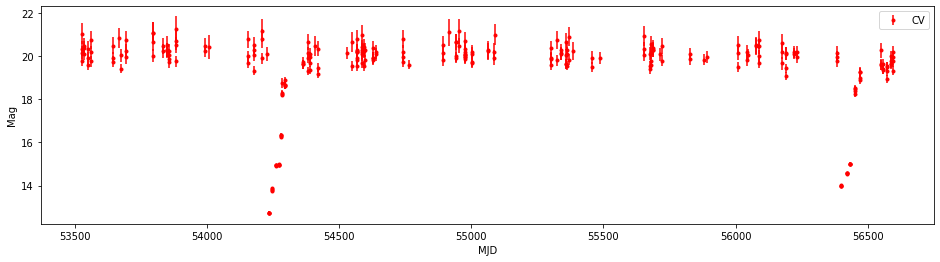

100 HPM


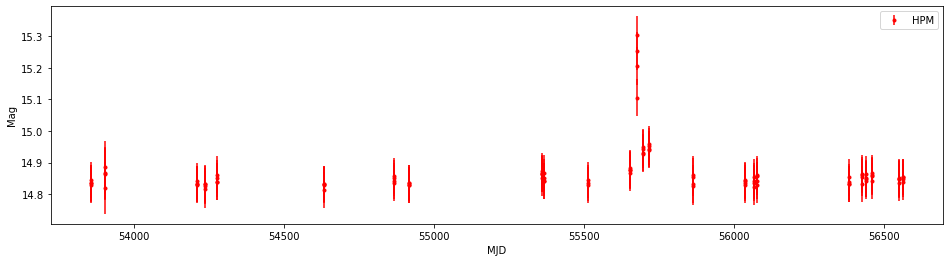

385 Carb


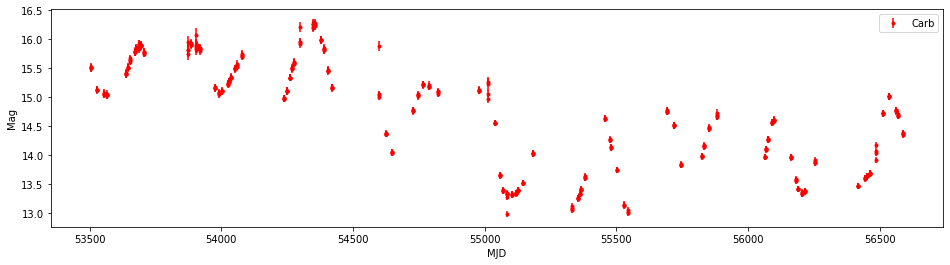

19 CV


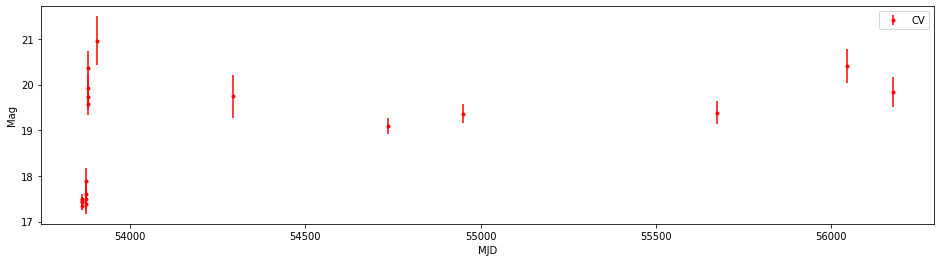

375 Flare


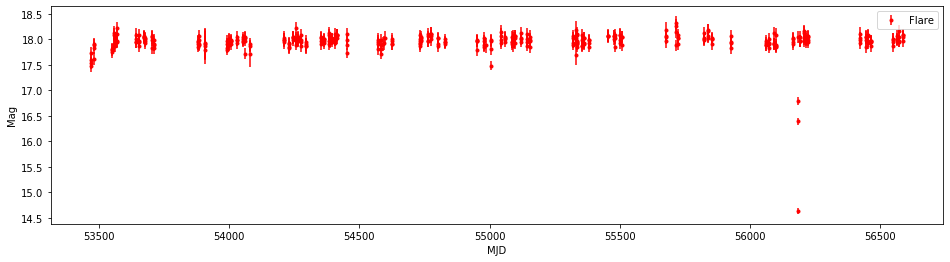

22 CV


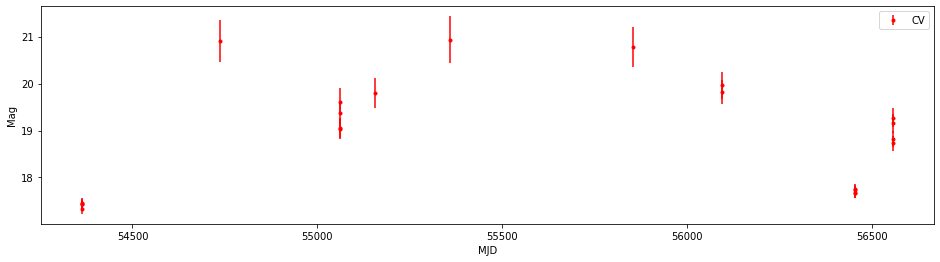

12 AGN


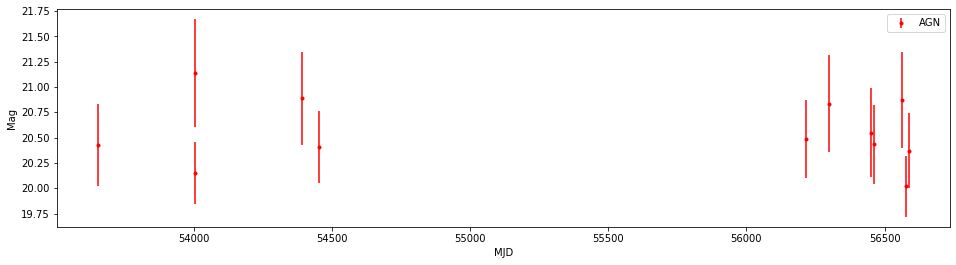

372 Flare


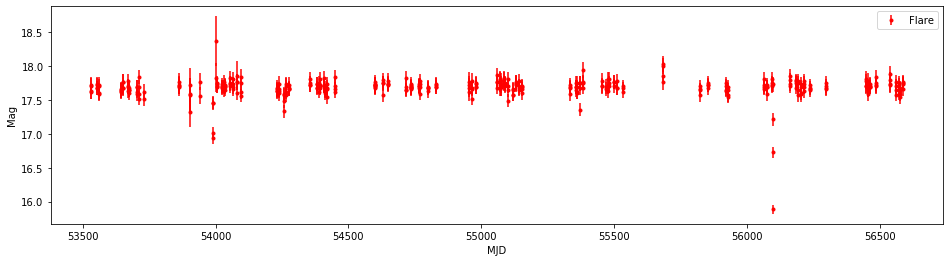

20 Unknown


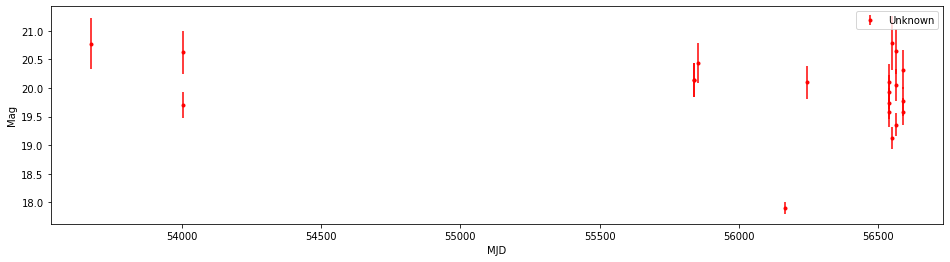

13 CV


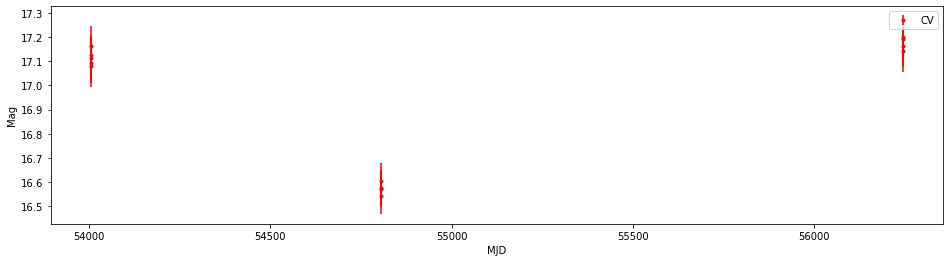

12 CV


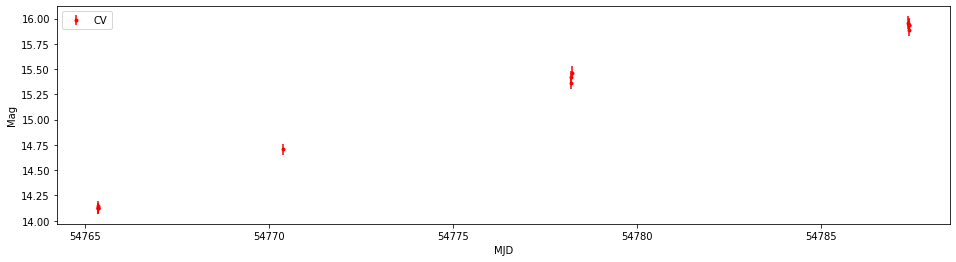

13 HPM


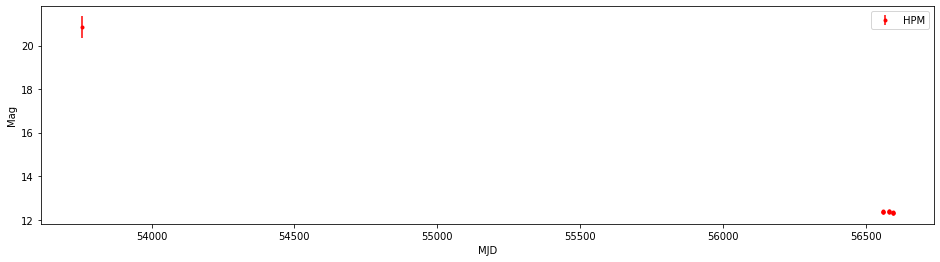

276 HPM


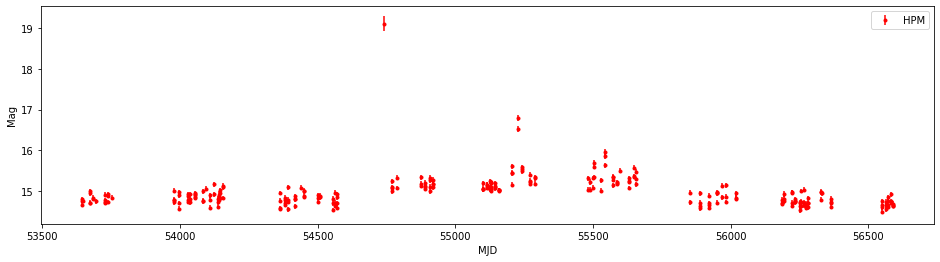

12 HPM


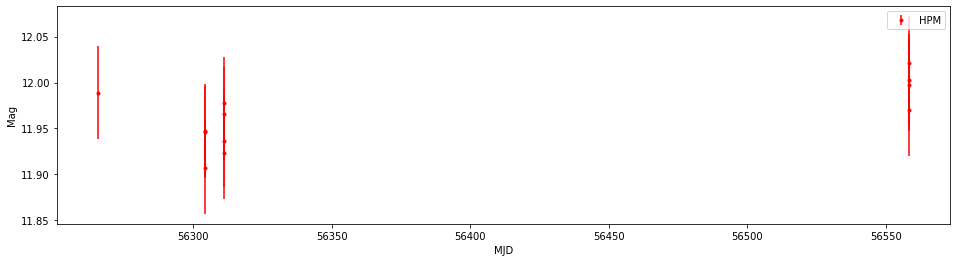

14 SN


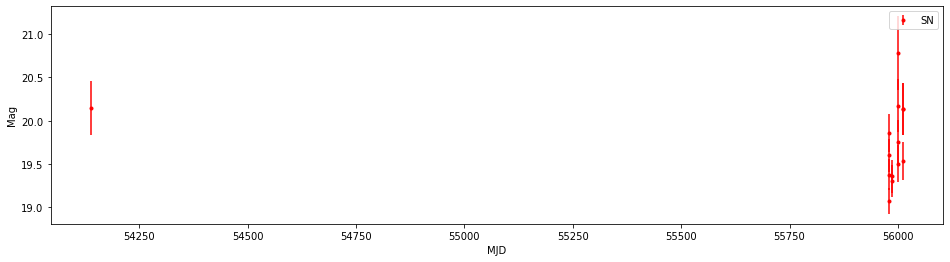

12 SN


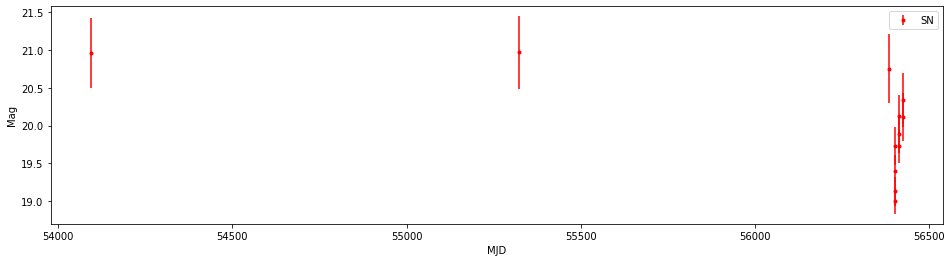

16 SN


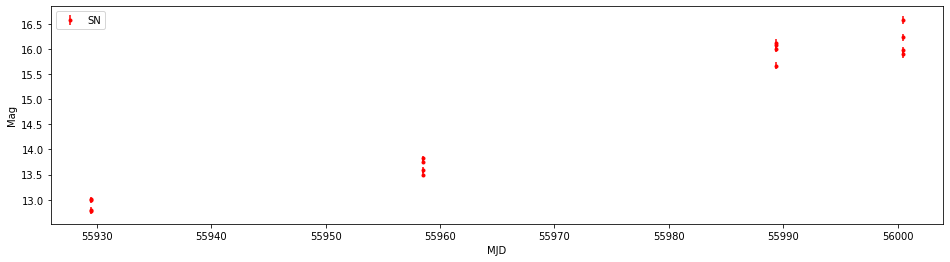

37 HPM


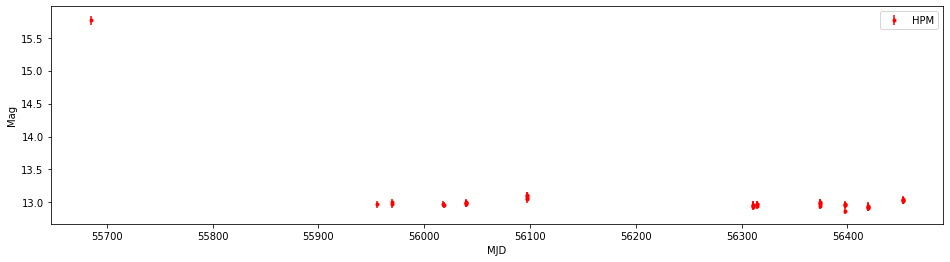

113 HPM


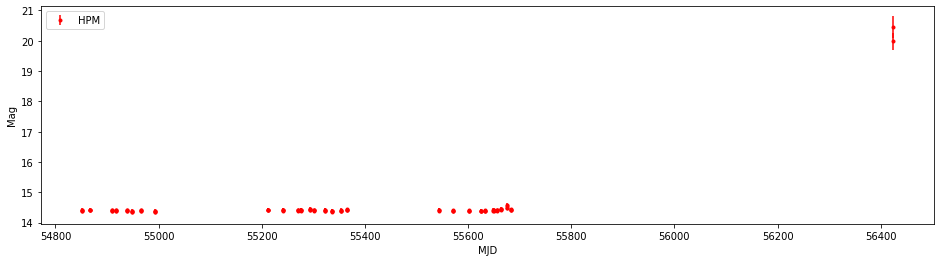

91 HPM


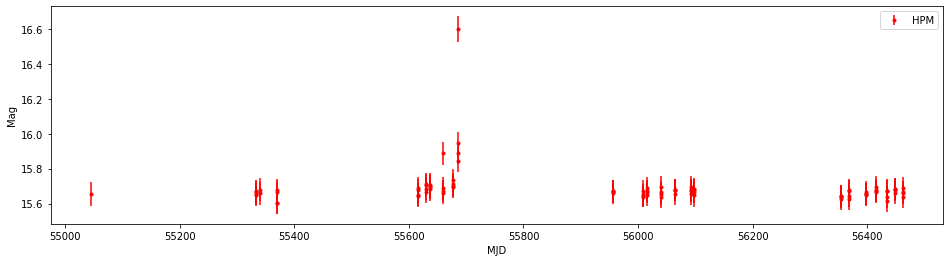

63 HPM


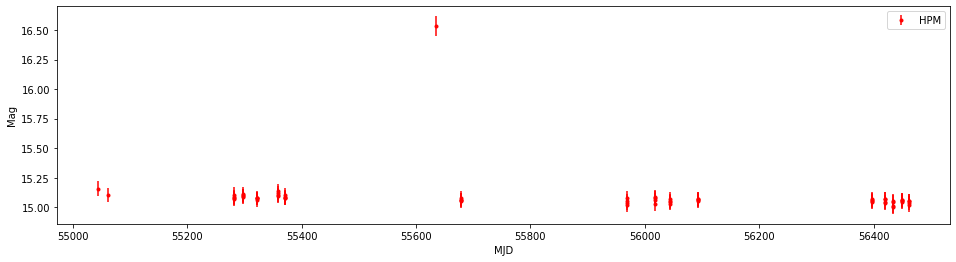

115 HPM


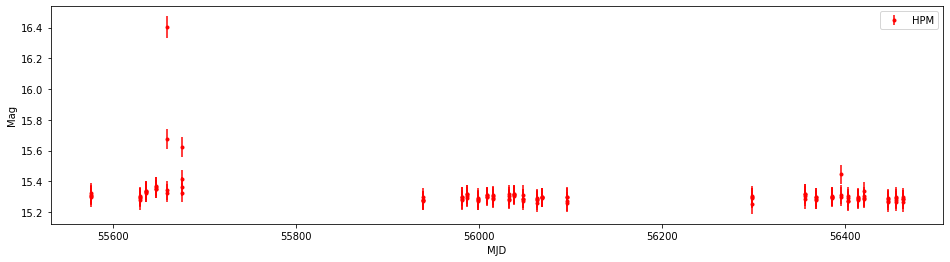

120 HPM


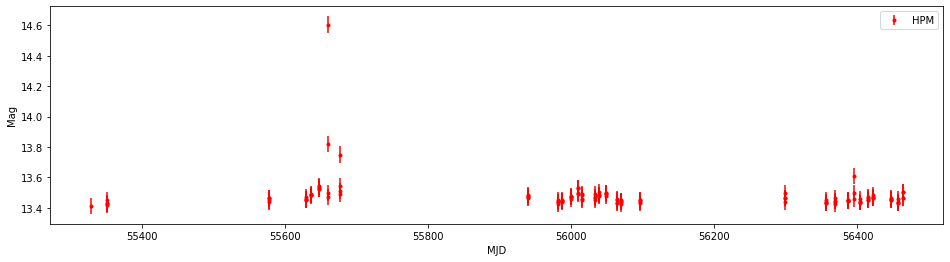

80 HPM


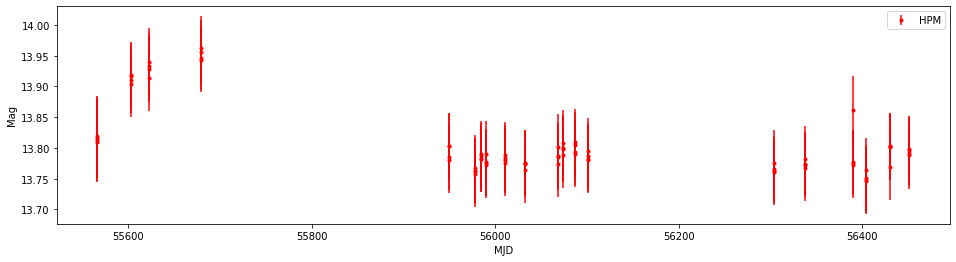

97 HPM


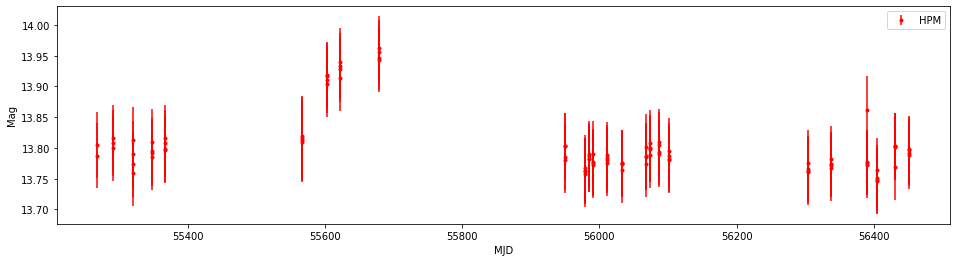

12 CV


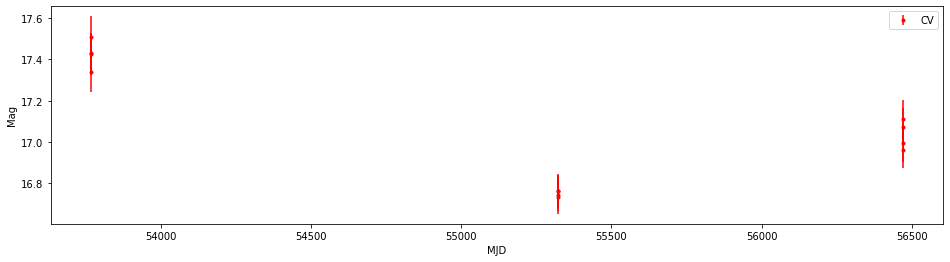

18 CV


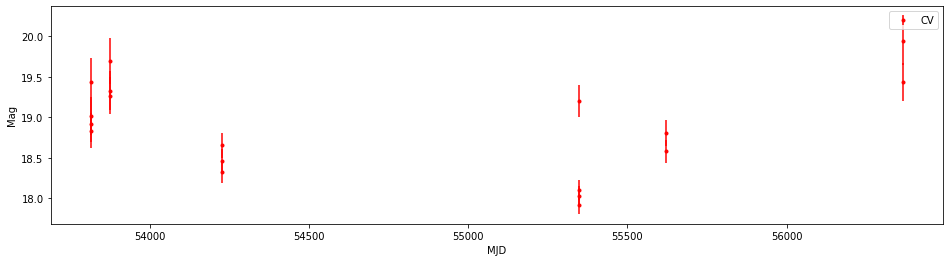

37 HPM


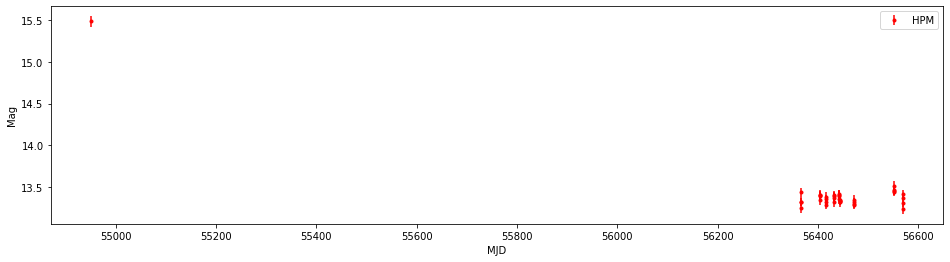

14 CV/Ast


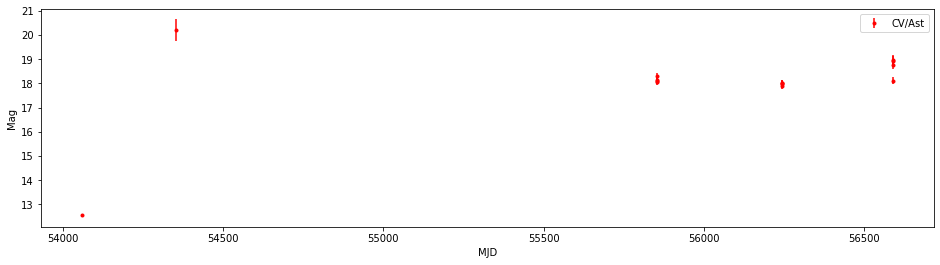

27 CV


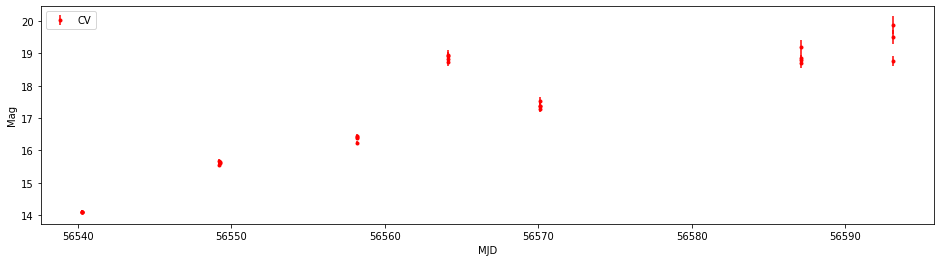

73 HPM


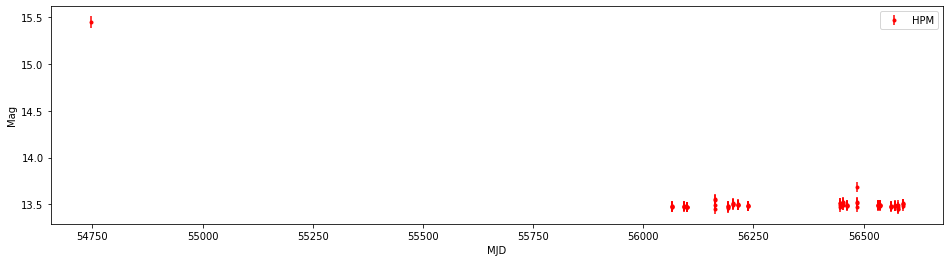

13 CV


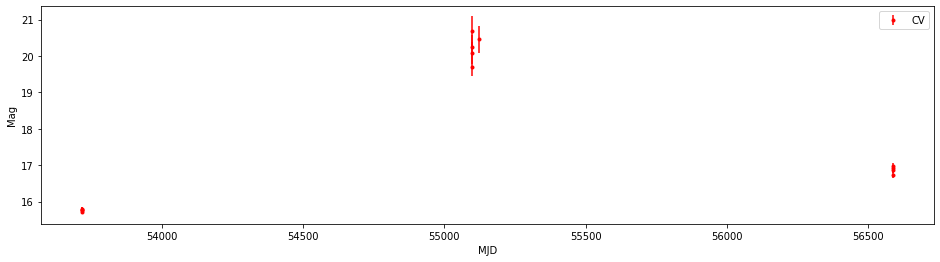

62 HPM


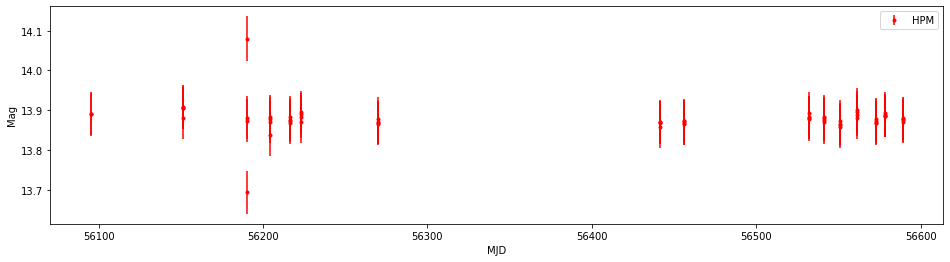

13 SN?


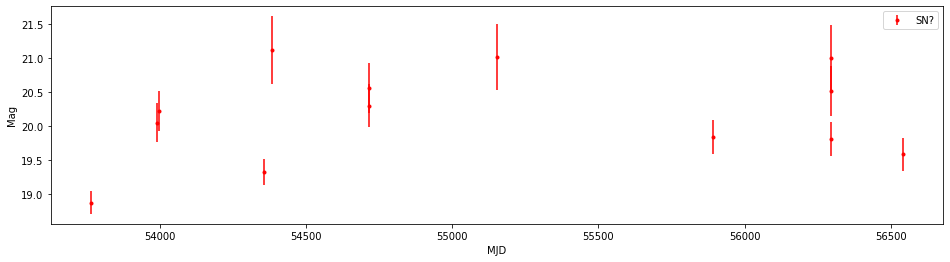

288 Blazar


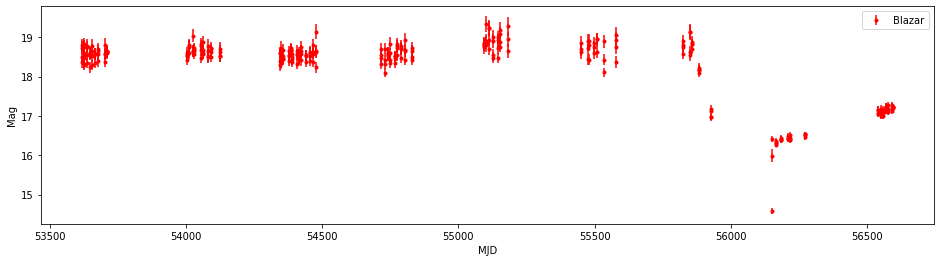

13 SN?


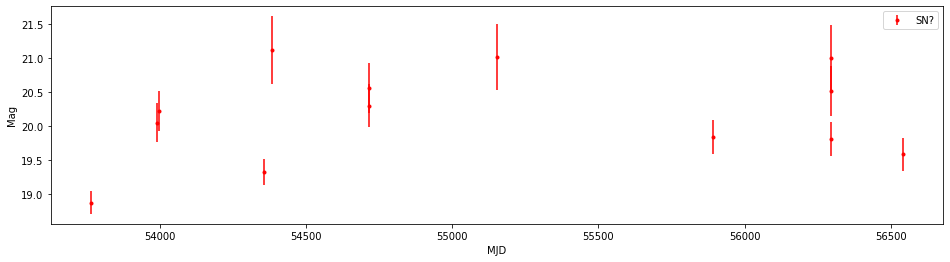

288 Blazar


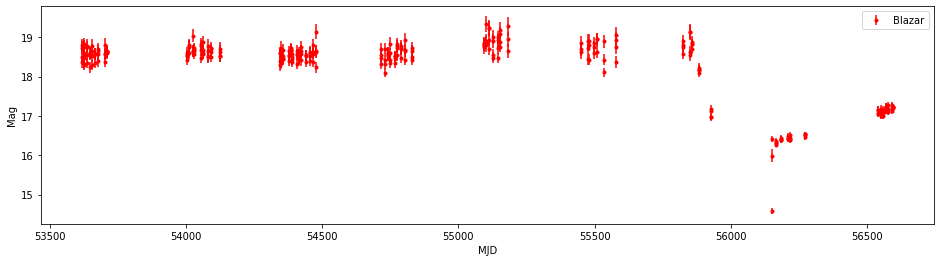

14 CV


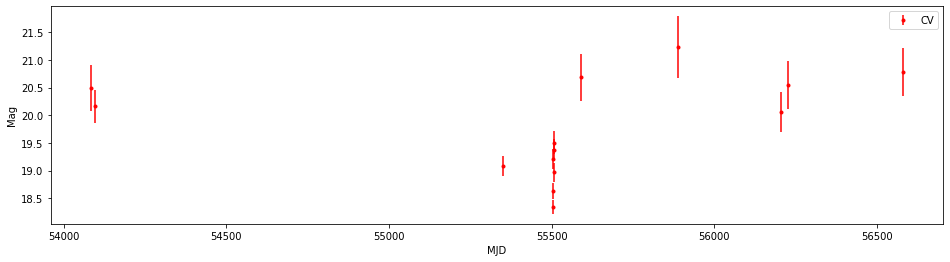

142 CV


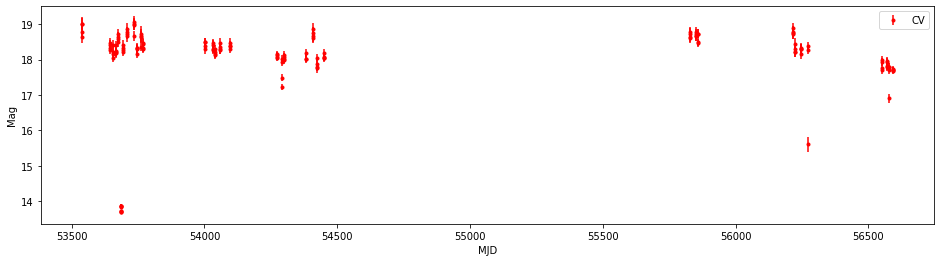

12 SN


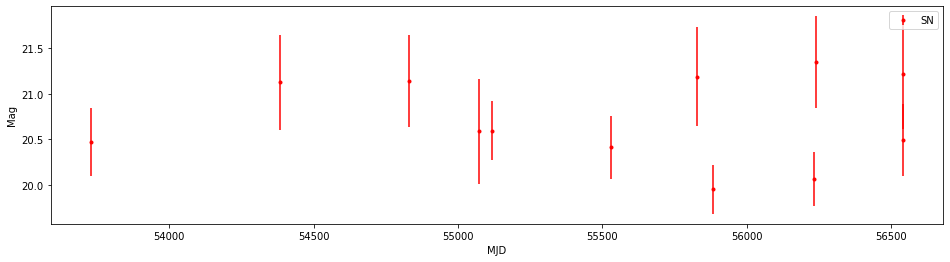

264 CV


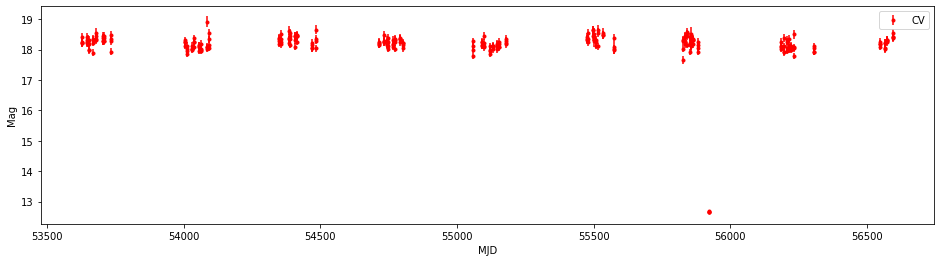

299 Flare


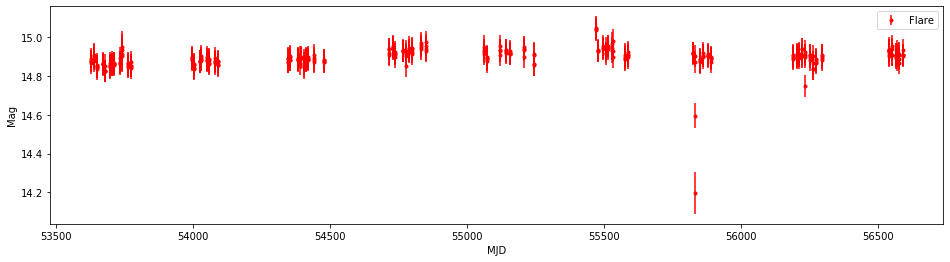

331 Flare


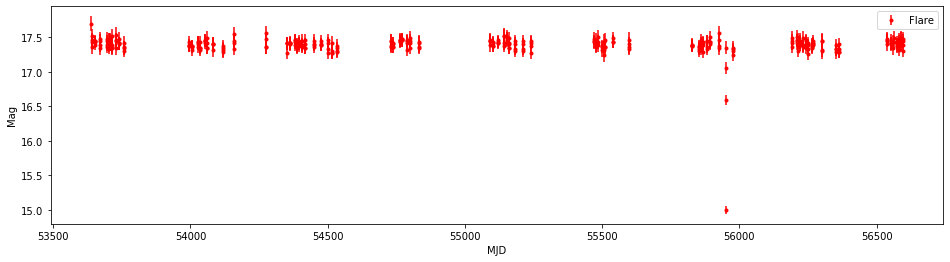

348 Flare


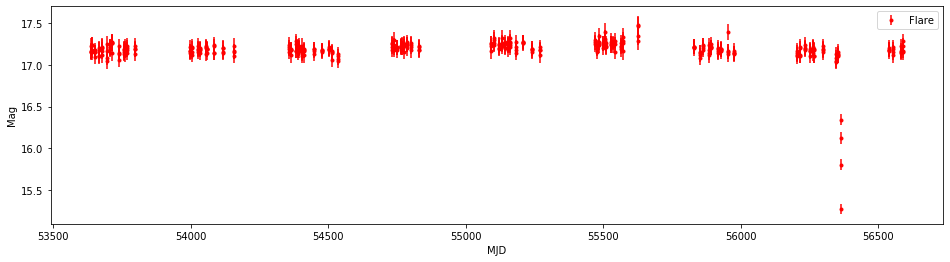

225 Carb


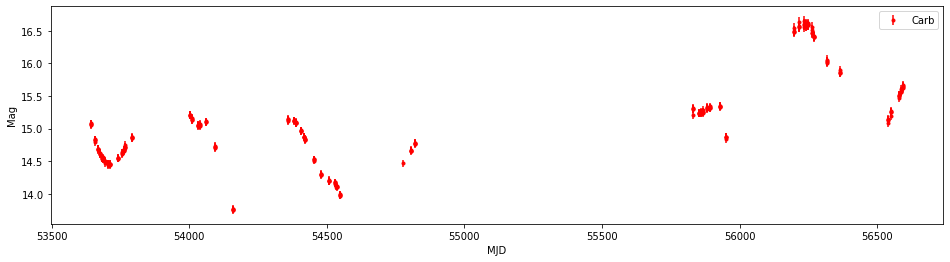

305 HPM


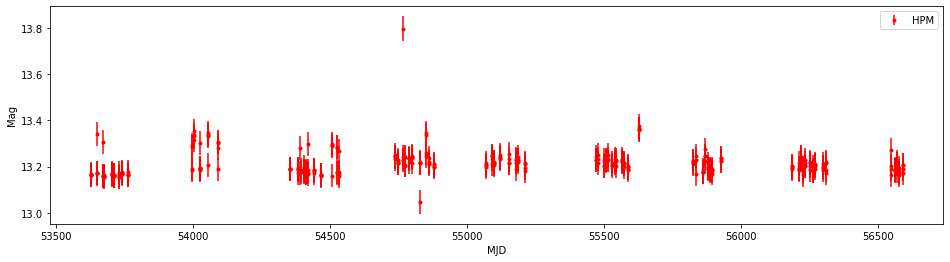

32 CV


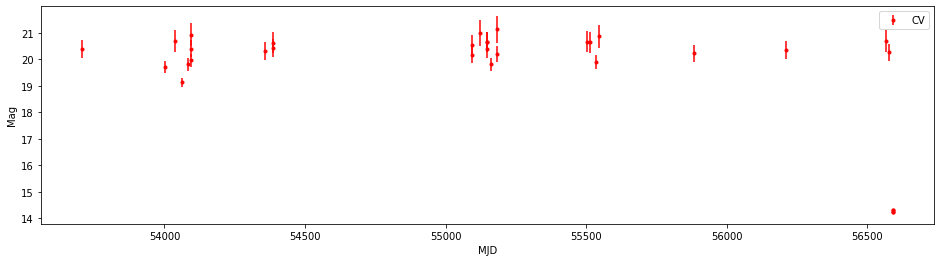

328 O/Ne


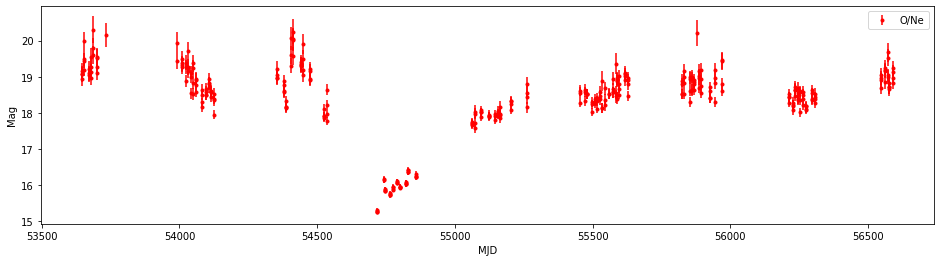

359 CV


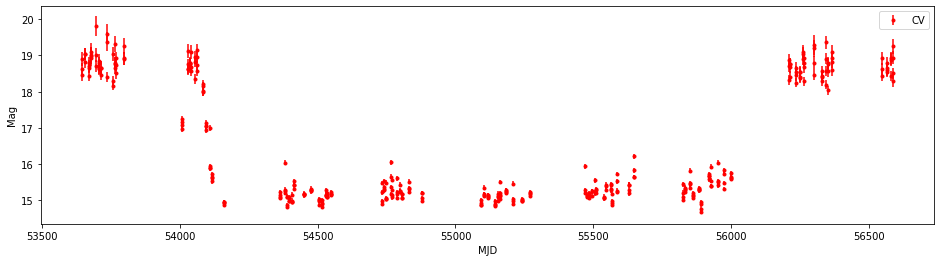

360 Flare


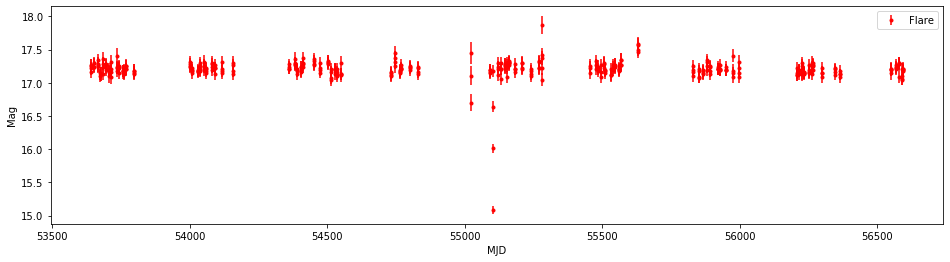

11 CV/SN


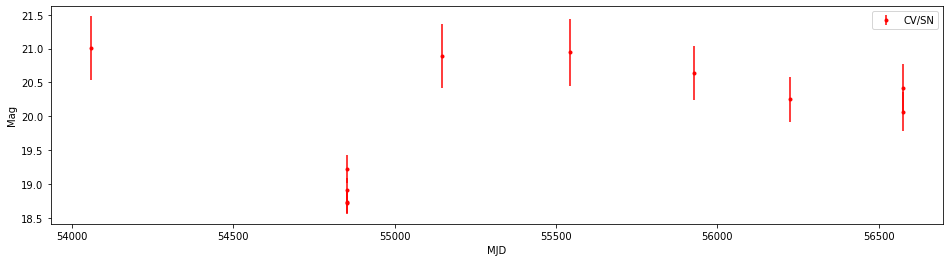

345 Flare


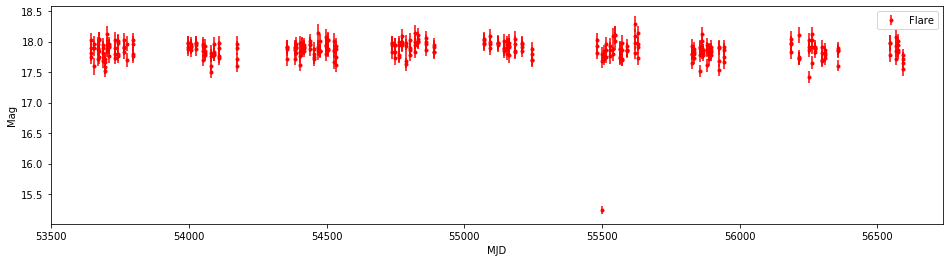

17 CV


KeyboardInterrupt: 

In [289]:
# Defining the model
model=IsolationForest(n_estimators=200, max_samples='auto', contamination=0.03,max_features=1.0)
model.fit(X)


# Predicting the anomalies
ft_data['iforest'] = pd.Series(model.predict(X))
ft_data['iforest_Counts'] = ft_data['iforest'].map({1:0,-1:1})
# Counting the detected anomalies
print(ft_data['iforest'].value_counts())

# Analysing the predicted anomalies
pred=ft_data.loc[ft_data['iforest'] == -1]
for i in range(len(pred.ID)):
    
    
    plt.figure(figsize=(16,4))
    plt.xlabel('MJD')
    plt.ylabel('Mag')
    lc = transient_lc[transient_lc['ID']==pred.ID.iloc[i]]
    print(len(lc),pred.Class.iloc[i])
    plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label=pred.Class.iloc[i])
    plt.legend()
    plt.show()
    

11 SN


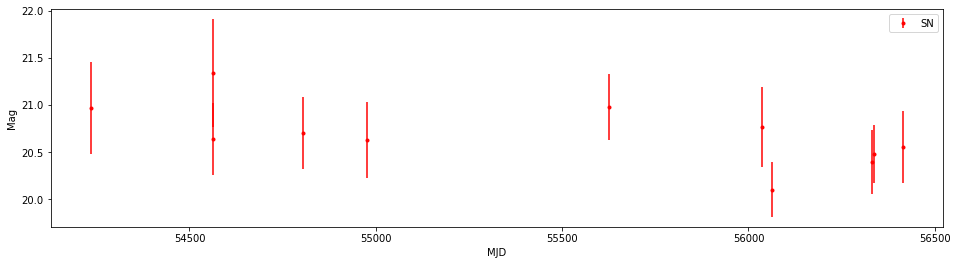

40 YSO


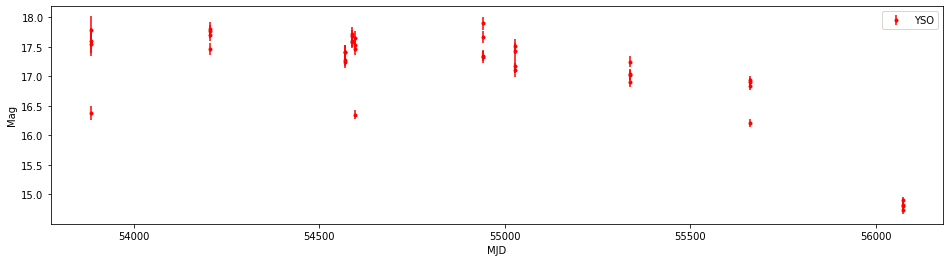

In [265]:
count = 0

pred=ft_data.loc[ft_data['iforest'] == -1]
for i in range(len(pred.ID)):
    
    
    plt.figure(figsize=(16,4))
    plt.xlabel('MJD')
    plt.ylabel('Mag')
    lc = transient_lc[transient_lc['ID']==pred.ID.iloc[i]]
    print(len(lc),pred.Class.iloc[i])
    plt.errorbar(lc.MJD,lc.Mag,yerr=lc.Magerr,fmt='.r',label=pred.Class.iloc[i])
    plt.legend()
    plt.show()
    
#     if len(lc)<10:
        
#         count += 1
    
# #     print('perriod_fit=',round(pred.Period_fit.iloc[i],2),'  #points',len(lc),pred.Class.iloc[i])
        
#     else:  
        
#     print('perriod_fit=',round(pred.Period_fit.iloc[i],2),'  #points',len(lc),pred.Class.iloc[i],'ID', pred.ID.iloc[i])
        